## Monthly Updated Prediction

Start Dates of Information:

Ferrero 2021-04-30 <br>
LindtSpruengli 2024-11-30 <br>
all other 2019_01_31 <br>

In [1]:
# loading libraries

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from math import nan

pd.set_option('display.max_columns', None)

In [2]:
# loading destatis data
path = '../data/processed/combined_data.csv'
df = pd.read_csv(path)
index_list = pd.read_csv('../data/processed/index_list_combined_data.csv', names=['Datum'])
index_list.drop(index_list.index[0], inplace=True)
df.index = index_list['Datum']
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

# dropping first column which is just the date
#df = df.iloc[:, 1:]
                # for usage of column numbers in baseline model this is needed

df

,date,Betriebe_WZ08-10,Betriebe_ep_WZ08-10,Beschäftigte_WZ08-10,Beschäftigte_ep_WZ08-10,Geleistete Arbeitsstunden_WZ08-10,Geleistete Arbeitsstunden_ep_WZ08-10,Bruttolohn- und -gehaltssumme_WZ08-10,Bruttolohn- und -gehaltssumme_ep_WZ08-10,Umsatz_WZ08-10,Umsatz_ep_WZ08-10,Inlandsumsatz_WZ08-10,Inlandsumsatz_ep_WZ08-10,Auslandsumsatz_WZ08-10,Auslandsumsatz_ep_WZ08-10,Auslandsumsatz mit der Eurozone_WZ08-10,Auslandsumsatz mit der Eurozone_ep_WZ08-10,Auslandsumsatz mit dem sonstigen Ausland_WZ08-10,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-10,Betriebe_WZ08-108,Betriebe_ep_WZ08-108,Beschäftigte_WZ08-108,Beschäftigte_ep_WZ08-108,Geleistete Arbeitsstunden_WZ08-108,Geleistete Arbeitsstunden_ep_WZ08-108,Bruttolohn- und -gehaltssumme_WZ08-108,Bruttolohn- und -gehaltssumme_ep_WZ08-108,Umsatz_WZ08-108,Umsatz_ep_WZ08-108,Inlandsumsatz_WZ08-108,Inlandsumsatz_ep_WZ08-108,Auslandsumsatz_WZ08-108,Auslandsumsatz_ep_WZ08-108,Auslandsumsatz mit der Eurozone_WZ08-108,Auslandsumsatz mit der Eurozone_ep_WZ08-108,Auslandsumsatz mit dem sonstigen Ausland_WZ08-108,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-108,Betriebe_WZ08-1082,Betriebe_ep_WZ08-1082,Beschäftigte_WZ08-1082,Beschäftigte_ep_WZ08-1082,Geleistete Arbeitsstunden_WZ08-1082,Geleistete Arbeitsstunden_ep_WZ08-1082,Bruttolohn- und -gehaltssumme_WZ08-1082,Bruttolohn- und -gehaltssumme_ep_WZ08-1082,Umsatz_WZ08-1082,Umsatz_ep_WZ08-1082,Inlandsumsatz_WZ08-1082,Inlandsumsatz_ep_WZ08-1082,Auslandsumsatz_WZ08-1082,Auslandsumsatz_ep_WZ08-1082,Auslandsumsatz mit der Eurozone_WZ08-1082,Auslandsumsatz mit der Eurozone_ep_WZ08-1082,Auslandsumsatz mit dem sonstigen Ausland_WZ08-1082,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-1082,Betriebe_WZ08-1083,Betriebe_ep_WZ08-1083,Beschäftigte_WZ08-1083,Beschäftigte_ep_WZ08-1083,Geleistete Arbeitsstunden_WZ08-1083,Geleistete Arbeitsstunden_ep_WZ08-1083,Bruttolohn- und -gehaltssumme_WZ08-1083,Bruttolohn- und -gehaltssumme_ep_WZ08-1083,Umsatz_WZ08-1083,Umsatz_ep_WZ08-1083,Inlandsumsatz_WZ08-1083,Inlandsumsatz_ep_WZ08-1083,Auslandsumsatz_WZ08-1083,Auslandsumsatz_ep_WZ08-1083,Auslandsumsatz mit der Eurozone_WZ08-1083,Auslandsumsatz mit der Eurozone_ep_WZ08-1083,Auslandsumsatz mit dem sonstigen Ausland_WZ08-1083,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-1083,ErzPr_Nahrungsmittel und Futtermittel,ErzPr_ Sonstige Nahrungsmittel (ohne Getränke),ErzPr_ Süßwaren (ohne Dauerbackwaren),ErzPr_ Schokoladen und andere Süßwaren,"ErzPr_ Schokolade u.a. kakaoh. Lebensm.zub.,in Verp.>2kg","ErzPr_ Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg",ErzPr_ Süßwaren oh. Kakaogeh. (einschl.weißer Schokolade),"ErzPr_ Kaffee und Tee, Kaffee-Ersatz","ErzPr_ Kaffee und Tee, Kaffee-Ersatz","ErzPr_ Kaffee, entkoffeiniert oder geröstet","ErzPr_ Kaffeemittel m. -geh.,Auszüge,Essenz.,Konzentrate","ErzPr_ Grüner Tee (n. ferment.), schwarzer Tee (ferment.)",ErzPr_ Kräutertees,EinfPr_Nahrungsmittel und Futtermittel,EinfPr_ Sonstige Nahrungsmittel (ohne Getränke),EinfPr_ Süßwaren (ohne Dauerbackwaren),"EinfPr_ Kaffee und Tee, Kaffee-Ersatz",VPI_Nahrungsmittel und alkoholfreie Getränke,VPI_ Nahrungsmittel,"VPI_ Zucker, Marmelade, Honig und andere Süßwaren",VPI_ Schokoladen,VPI_ Süßwaren,VPI_ Alkoholfreie Getränke,"VPI_ Kaffee, Tee und Kakao",VPI_ Kaffee und Ähnliches,VPI_ Tee und teeähnliche Erzeugnisse,VPI_ Kakaopulver oder Ähnliches,"Wert der zum Absatz bestimmten Produktion_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Wert der zum Absatz bestimmten Produktion_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_t_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_t_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_kg_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_kg_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Menge der zum Absatz bestimmten Produktion_stueck_Leb-, Honigkuchen, Kekse, Klei

In [3]:
# Defining demand and price::
demand = (df.iloc[:, 45])
price = df.iloc[:, 122]

# Calculating percentage change in demand and price
demand_change = demand.pct_change()
price_change = price.pct_change()

# Calculating price elasticity of demand
df.loc[:, 'elasticity'] = demand_change / price_change
df['elasticity'] = df['elasticity'].replace([np.inf, -np.inf], np.nan)
df
#elasticity = elasticity.replace([np.inf, -np.inf], np.nan)
#elasticity = elasticity.fillna(method='ffill')  # Filling NaN values with forward fill method
#elasticity = elasticity.fillna(method='bfill')  # Filling remaining NaN values with backward fill method
#elasticity.name = 'Elasticity'
# elasticity_df = pd.DataFrame(elasticity)    # creating a dataframe of elasticity as it was a series before and we want to plot it with seaborn which needs a dataframe
# elasticity_df.index = df.index  # setting the index of the elasticity dataframe to be the same as the original dataframe

C:\Users\jmerg\AppData\Local\Temp\ipykernel_8180\1157654685.py:6: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  demand_change = demand.pct_change()
C:\Users\jmerg\AppData\Local\Temp\ipykernel_8180\1157654685.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  price_change = price.pct_change()


,date,Betriebe_WZ08-10,Betriebe_ep_WZ08-10,Beschäftigte_WZ08-10,Beschäftigte_ep_WZ08-10,Geleistete Arbeitsstunden_WZ08-10,Geleistete Arbeitsstunden_ep_WZ08-10,Bruttolohn- und -gehaltssumme_WZ08-10,Bruttolohn- und -gehaltssumme_ep_WZ08-10,Umsatz_WZ08-10,Umsatz_ep_WZ08-10,Inlandsumsatz_WZ08-10,Inlandsumsatz_ep_WZ08-10,Auslandsumsatz_WZ08-10,Auslandsumsatz_ep_WZ08-10,Auslandsumsatz mit der Eurozone_WZ08-10,Auslandsumsatz mit der Eurozone_ep_WZ08-10,Auslandsumsatz mit dem sonstigen Ausland_WZ08-10,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-10,Betriebe_WZ08-108,Betriebe_ep_WZ08-108,Beschäftigte_WZ08-108,Beschäftigte_ep_WZ08-108,Geleistete Arbeitsstunden_WZ08-108,Geleistete Arbeitsstunden_ep_WZ08-108,Bruttolohn- und -gehaltssumme_WZ08-108,Bruttolohn- und -gehaltssumme_ep_WZ08-108,Umsatz_WZ08-108,Umsatz_ep_WZ08-108,Inlandsumsatz_WZ08-108,Inlandsumsatz_ep_WZ08-108,Auslandsumsatz_WZ08-108,Auslandsumsatz_ep_WZ08-108,Auslandsumsatz mit der Eurozone_WZ08-108,Auslandsumsatz mit der Eurozone_ep_WZ08-108,Auslandsumsatz mit dem sonstigen Ausland_WZ08-108,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-108,Betriebe_WZ08-1082,Betriebe_ep_WZ08-1082,Beschäftigte_WZ08-1082,Beschäftigte_ep_WZ08-1082,Geleistete Arbeitsstunden_WZ08-1082,Geleistete Arbeitsstunden_ep_WZ08-1082,Bruttolohn- und -gehaltssumme_WZ08-1082,Bruttolohn- und -gehaltssumme_ep_WZ08-1082,Umsatz_WZ08-1082,Umsatz_ep_WZ08-1082,Inlandsumsatz_WZ08-1082,Inlandsumsatz_ep_WZ08-1082,Auslandsumsatz_WZ08-1082,Auslandsumsatz_ep_WZ08-1082,Auslandsumsatz mit der Eurozone_WZ08-1082,Auslandsumsatz mit der Eurozone_ep_WZ08-1082,Auslandsumsatz mit dem sonstigen Ausland_WZ08-1082,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-1082,Betriebe_WZ08-1083,Betriebe_ep_WZ08-1083,Beschäftigte_WZ08-1083,Beschäftigte_ep_WZ08-1083,Geleistete Arbeitsstunden_WZ08-1083,Geleistete Arbeitsstunden_ep_WZ08-1083,Bruttolohn- und -gehaltssumme_WZ08-1083,Bruttolohn- und -gehaltssumme_ep_WZ08-1083,Umsatz_WZ08-1083,Umsatz_ep_WZ08-1083,Inlandsumsatz_WZ08-1083,Inlandsumsatz_ep_WZ08-1083,Auslandsumsatz_WZ08-1083,Auslandsumsatz_ep_WZ08-1083,Auslandsumsatz mit der Eurozone_WZ08-1083,Auslandsumsatz mit der Eurozone_ep_WZ08-1083,Auslandsumsatz mit dem sonstigen Ausland_WZ08-1083,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-1083,ErzPr_Nahrungsmittel und Futtermittel,ErzPr_ Sonstige Nahrungsmittel (ohne Getränke),ErzPr_ Süßwaren (ohne Dauerbackwaren),ErzPr_ Schokoladen und andere Süßwaren,"ErzPr_ Schokolade u.a. kakaoh. Lebensm.zub.,in Verp.>2kg","ErzPr_ Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg",ErzPr_ Süßwaren oh. Kakaogeh. (einschl.weißer Schokolade),"ErzPr_ Kaffee und Tee, Kaffee-Ersatz","ErzPr_ Kaffee und Tee, Kaffee-Ersatz","ErzPr_ Kaffee, entkoffeiniert oder geröstet","ErzPr_ Kaffeemittel m. -geh.,Auszüge,Essenz.,Konzentrate","ErzPr_ Grüner Tee (n. ferment.), schwarzer Tee (ferment.)",ErzPr_ Kräutertees,EinfPr_Nahrungsmittel und Futtermittel,EinfPr_ Sonstige Nahrungsmittel (ohne Getränke),EinfPr_ Süßwaren (ohne Dauerbackwaren),"EinfPr_ Kaffee und Tee, Kaffee-Ersatz",VPI_Nahrungsmittel und alkoholfreie Getränke,VPI_ Nahrungsmittel,"VPI_ Zucker, Marmelade, Honig und andere Süßwaren",VPI_ Schokoladen,VPI_ Süßwaren,VPI_ Alkoholfreie Getränke,"VPI_ Kaffee, Tee und Kakao",VPI_ Kaffee und Ähnliches,VPI_ Tee und teeähnliche Erzeugnisse,VPI_ Kakaopulver oder Ähnliches,"Wert der zum Absatz bestimmten Produktion_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Wert der zum Absatz bestimmten Produktion_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_t_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_t_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_kg_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_kg_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Menge der zum Absatz bestimmten Produktion_stueck_Leb-, Honigkuchen, Kekse, Klei

In [4]:
# defining target and features
target = 'elasticity'
feature_names = df.iloc[:, [88,93,78,166,167,168,169,170]].columns.tolist()          # 144 wert kaffee rausgenommen wegen inhalt der target var!
features =  feature_names       # defining extra object for later additions
# all features: features = [col for col in df.columns if col != target]

# defining X and y
X = df[features]    
y = df[target]

# checking for missing values
missing_values = X.isnull().sum()  
print("Missing values in each column:")
print(missing_values)



Missing values in each column:
EinfPr_    Süßwaren (ohne Dauerbackwaren)                            0
VPI_      Schokoladen                                                0
ErzPr_        Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg     0
PCOCOUSDM                                                            0
PCOFFROBUSDM                                                         0
Ferrero                                                             27
Mondelez                                                             0
LindtSpruengli                                                      70
dtype: int64


#### Defining Training Periods

In [5]:
# splitting data into time based batches with respective train and test sets
                                                    # option: from sklearn.model_selection import TimeSeriesSplit

# defining batch without Ferrero and LindtSpruengli due to missing values for forst time period
X_batch_1 = X.drop(columns=['Ferrero', 'LindtSpruengli'])
start_date = '2019-01-31'
end_date = '2021-03-31'
X_batch_1 = X_batch_1.loc[start_date:end_date]
y_batch_1 = y.loc[start_date:end_date]

# defining batch with Ferrero for second time period
X_batch_2 = X.drop(columns=['LindtSpruengli'])
start_date = '2021-04-30'
end_date = '2024-10-31'
X_batch_2 = X_batch_2.loc[start_date:end_date]
y_batch_2 = y.loc[start_date:end_date]

# defining batch with LindtSpruengli for third time period
X_batch_3 = X
start_date = '2024-11-30'
end_date = '2025-11-30'
X_batch_3 = X_batch_3.loc[start_date:end_date]
y_batch_3 = y.loc[start_date:end_date]

In [6]:
# Train Test Split for each batch based on dates

# Batch 1
train_start_date_1 = '2019-01-31'
train_end_date_1 = '2021-03-31'     # incoming new data Ferrero on 2021-04-30
test_start_date_1 = '2020-12-31'
test_end_date_1 = '2021-03-31'

X_train_1 = X_batch_1.loc[train_start_date_1:train_end_date_1]
y_train_1 = y_batch_1.loc[train_start_date_1:train_end_date_1]
X_test_1 = X_batch_1.loc[test_start_date_1:test_end_date_1]
y_test_1 = y_batch_1.loc[test_start_date_1:test_end_date_1] 

# Batch 2
train_start_date_2 = '2021-04-30'
train_end_date_2 = '2024-10-31'     # incoming new data LindtSpruengli on 2024-11-30
test_start_date_2 = '2024-07-31'
test_end_date_2 = '2024-10-31'  

X_train_2 = X_batch_2.loc[train_start_date_2:train_end_date_2]
y_train_2 = y_batch_2.loc[train_start_date_2:train_end_date_2]
X_test_2 = X_batch_2.loc[test_start_date_2:test_end_date_2]
y_test_2 = y_batch_2.loc[test_start_date_2:test_end_date_2]

# Batch 3
train_start_date_3 = '2024-11-30'
train_end_date_3 = '2025-08-31'     # end of data 4 months later on 2025-11-30
test_start_date_3 = '2025-08-31'
test_end_date_3 = '2025-11-30'

X_train_3 = X_batch_3.loc[train_start_date_3:train_end_date_3]
y_train_3 = y_batch_3.loc[train_start_date_3:train_end_date_3]
X_test_3 = X_batch_3.loc[test_start_date_3:test_end_date_3]
y_test_3 = y_batch_3.loc[test_start_date_3:test_end_date_3]




#### Feature Availability is different:
Only stock information is avaiable at the current time of prediction, official statistical data is at most at the beginning of the next month available <br>
<br>
Solution: lagged features must be included in training!

In [7]:
# defining lagged features for batch 1

features_lagged_1 = X_train_1.iloc[:, 0:3].shift(1)  # creating lagged features for the first 4 features in the training set of batch 1
features_lagged_names_1 = features_lagged_1.columns.tolist()  # storing the names of the lagged features in a separate list for later use
features_lagged_1.columns = [col + '_lagged' for col in features_lagged_1.columns]  # renaming lagged features to distinguish them from original features
features_lagged_1 = features_lagged_1.fillna(method='bfill')  # filling NaN values in lagged features with backward fill method
features_lagged_1 = features_lagged_1.fillna(method='ffill')  # filling remaining NaN values in lagged features with forward fill method

# combining original features with lagged features for training and dropping original features which are now redundant due to lagged features
X_train_1_combined = pd.concat([X_train_1, features_lagged_1], axis=1)
X_train_1_combined.drop(columns=feature_names[0:3], inplace=True)  # dropping original features which are now redundant due to lagged features

# same for test set
features_lagged_test_1 = X_test_1.iloc[:, 0:3].shift(1) 
features_lagged_test_1.columns = [col + '_lagged' for col in features_lagged_test_1.columns]  # renaming lagged features to distinguish them from original features
# filling NaN values in lagged features with data from training set to avoid data leakage
features_lagged_test_1 = features_lagged_test_1.fillna(features_lagged_1.iloc[-1])  # filling NaN values in lagged features with last row of lagged features from training set
features_lagged_test_1 = features_lagged_test_1.fillna(features_lagged_1.iloc[0])  # filling remaining NaN values in lagged features with first row of lagged features from training set
X_test_1_combined = pd.concat([X_test_1, features_lagged_test_1], axis=1)
X_test_1_combined.drop(columns=feature_names[0:3], inplace=True)  # dropping original features which are now redundant due to lagged features


# defining lagged features for batch 2
features_lagged_2 = X_train_2.iloc[:, 0:3].shift(1)  # creating lagged features for the first 4 features in the training set of batch 2
features_lagged_names_2 = features_lagged_2.columns.tolist()  # storing the names of the lagged features in a separate list for later use
features_lagged_2.columns = [col + '_lagged' for col in features_lagged_2.columns]  # renaming lagged features to distinguish them from original features

# filling NaN values in lagged features with data from training set to avoid data leakage
features_lagged_2 = features_lagged_2.fillna(method='bfill')  # filling NaN values in lagged features with backward fill method
features_lagged_2 = features_lagged_2.fillna(method='ffill')  # filling remaining NaN values in lagged features with forward fill method    

# combining original features with lagged features for training and dropping original features which are now redundant due to lagged features
X_train_2_combined = pd.concat([X_train_2, features_lagged_2], axis=1)
X_train_2_combined.drop(columns=feature_names[0:3], inplace=True)  # dropping original features which are now redundant due to lagged features

# same for test set
features_lagged_test_2 = X_test_2.iloc[:, 0:3].shift(1) 
features_lagged_test_2.columns = [col + '_lagged' for col in features_lagged_test_2.columns]  # renaming lagged features to distinguish them from original features
# filling NaN values in lagged features with data from training set to avoid data leakage
features_lagged_test_2 = features_lagged_test_2.fillna(features_lagged_2.iloc[-1])  # filling NaN values in lagged features with last row of lagged features from training set
features_lagged_test_2 = features_lagged_test_2.fillna(features_lagged_2.iloc[0])  # filling remaining NaN values in lagged features with first row of lagged features from training set
X_test_2_combined = pd.concat([X_test_2, features_lagged_test_2], axis=1)
X_test_2_combined.drop(columns=feature_names[0:3], inplace=True)  # dropping original features which are now redundant due to lagged features


# defining lagged features for batch 3
features_lagged_3 = X_train_3.iloc[:, 0:3].shift(1)  # creating lagged features for the first 4 features in the training set of batch 3
features_lagged_names_3 = features_lagged_3.columns.tolist()  # storing the names of the lagged features in a separate list for later use
features_lagged_3.columns = [col + '_lagged' for col in features_lagged_3.columns]  # renaming lagged features to distinguish them from original features   
# filling NaN values in lagged features with data from training set to avoid data leakage
features_lagged_3 = features_lagged_3.fillna(method='bfill')  # filling NaN values in lagged features with backward fill method
features_lagged_3 = features_lagged_3.fillna(method='ffill')  # filling remaining NaN values in lagged features with forward fill method    

# combining original features with lagged features for training and dropping original features which are now redundant due to lagged features
X_train_3_combined = pd.concat([X_train_3, features_lagged_3], axis=1)
X_train_3_combined.drop(columns=feature_names[0:3], inplace=True)  # dropping original features which are now redundant due to lagged features
# same for test set
features_lagged_test_3 = X_test_3.iloc[:, 0:3].shift(1) 
features_lagged_test_3.columns = [col + '_lagged' for col in features_lagged_test_3.columns]  # renaming lagged features to distinguish them from original features
# filling NaN values in lagged features with data from training set to avoid data leakage
features_lagged_test_3 = features_lagged_test_3.fillna(features_lagged_3.iloc[-1])  # filling NaN values in lagged features with last row of lagged features from training set
features_lagged_test_3 = features_lagged_test_3.fillna(features_lagged_3.iloc[0])  # filling remaining NaN values in lagged features with first row of lagged features from training set
X_test_3_combined = pd.concat([X_test_3, features_lagged_test_3], axis=1)
X_test_3_combined.drop(columns=feature_names[0:3], inplace=True)  # dropping original features which are now redundant due to lagged features


C:\Users\jmerg\AppData\Local\Temp\ipykernel_8180\515679456.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features_lagged_1 = features_lagged_1.fillna(method='bfill')  # filling NaN values in lagged features with backward fill method
C:\Users\jmerg\AppData\Local\Temp\ipykernel_8180\515679456.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features_lagged_1 = features_lagged_1.fillna(method='ffill')  # filling remaining NaN values in lagged features with forward fill method
C:\Users\jmerg\AppData\Local\Temp\ipykernel_8180\515679456.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features_lagged_2 = features_lagged_2.fillna(method='bfill')  # filling NaN values in lagged features with backward fill meth

In [8]:
# imputation and scaling of features for batch 1
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline # using imblearn pipeline to avoid data leakage during imputation and scaling

# creating pipeline for imputation and scaling

imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler)
])

# fitting pipeline on training data and transforming both training and test data for each batch

X_train_1_processed = pipeline.fit_transform(X_train_1_combined)
X_test_1_processed = pipeline.transform(X_test_1_combined)

# imputation and scaling of features for batch 2
X_train_2_processed = pipeline.fit_transform(X_train_2_combined)
X_test_2_processed = pipeline.transform(X_test_2_combined)

# imputation and scaling of features for batch 3
X_train_3_processed = pipeline.fit_transform(X_train_3_combined)
X_test_3_processed = pipeline.transform(X_test_3_combined)


In [9]:
# converting training sets into dataframes for later use in prediction and plotting
X_train_1_processed_df = pd.DataFrame(X_train_1_processed, columns=X_train_1_combined.columns, index=X_train_1_combined.index)
X_train_2_processed_df = pd.DataFrame(X_train_2_processed, columns=X_train_2_combined.columns, index=X_train_2_combined.index)
X_train_3_processed_df = pd.DataFrame(X_train_3_processed, columns=X_train_3_combined.columns, index=X_train_3_combined.index)


# converting test sets into dataframes for later use in prediction and plotting
X_test_1_processed_df = pd.DataFrame(X_test_1_processed, columns=X_test_1_combined.columns, index=X_test_1_combined.index)
X_test_2_processed_df = pd.DataFrame(X_test_2_processed, columns=X_test_2_combined.columns, index=X_test_2_combined.index)
X_test_3_processed_df = pd.DataFrame(X_test_3_processed, columns=X_test_3_combined.columns, index=X_test_3_combined.index)

In [15]:
# imputing missing values in target variable with 0
y_train_1_imputed = y_train_1.fillna(0)
# y_test_1_imputed = y_test_1.fillna(0)

y_train_2_imputed = y_train_2.fillna(0)
# y_test_2_imputed = y_test_2.fillna(0)

y_train_3_imputed = y_train_3.fillna(0)
# y_test_3_imputed = y_test_3.fillna(0)

In [17]:
# checking for missing values in batches
print("Missing values in Batch 1:")
print(X_train_1_processed_df.isnull().sum())
print(X_test_1_processed_df.isnull().sum())
print(y_train_1.isnull().sum())
print(y_train_1_imputed.isnull().sum())
print(y_test_1.isnull().sum())

Missing values in Batch 1:
PCOCOUSDM                                                                  0
PCOFFROBUSDM                                                               0
Mondelez                                                                   0
EinfPr_    Süßwaren (ohne Dauerbackwaren)_lagged                           0
VPI_      Schokoladen_lagged                                               0
ErzPr_        Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg_lagged    0
dtype: int64
PCOCOUSDM                                                                  0
PCOFFROBUSDM                                                               0
Mondelez                                                                   0
EinfPr_    Süßwaren (ohne Dauerbackwaren)_lagged                           0
VPI_      Schokoladen_lagged                                               0
ErzPr_        Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg_lagged    0
dtype: int64
1
0
0


time lag of 2 months or more should be considered for coffee futures <br>
no time lag for cacao futures needed

## XGBoost Model

In [12]:
# training and evaluating XGBoost model
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore") 

# defining function for training and evaluating XGBoost model for each batch to avoid code repetition
def train_evaluate_xgboost(X_train, y_train, X_test, y_test):
    # fitting XGBoost model on training data
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train)

    # making predictions on test data
    y_pred = model.predict(X_test)

    # calculating mean relative error, mean absolute error and r2 score
    mean_relative_error = np.mean(np.abs((y_test - y_pred) / y_test))
    mean_absolute_error_value = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return y_pred, mean_relative_error, mean_absolute_error_value, r2




In [36]:
X_test

,PCOCOUSDM,PCOFFROBUSDM,Mondelez,EinfPr_ Süßwaren (ohne Dauerbackwaren)_lagged,VPI_ Schokoladen_lagged,"ErzPr_ Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg_lagged"
Datum,,,,,,
2020-12-31,0.344860,0.165464,0.220591,-2.136483,3.858340,2.335419
2021-01-31,0.243847,-0.138411,-0.037212,-1.078042,0.074543,0.996385
2021-02-28,0.165312,0.548010,-0.494781,-3.089080,1.282138,3.065801
2021-03-31,0.861633,0.678995,0.319861,-2.136483,3.858340,2.335419


In [ ]:
# XGBoost prediction and evaluation for first month of first batch
testing_date = '2021-03-31'
X_train = X_train_1_processed_df[:testing_date]
y_train = y_train_1_imputed[:testing_date]
X_test = X_test_1_processed_df.loc[:testing_date]
y_test = y_test_1.loc[:testing_date]

new_columnnames = ['KakaoFutures', 'KaffeeFutures', 'Mondelez', 'EinfuhrPreiseSchokoLag', 'VPISchokoLag', 'ErzeugerpreiseSchokoLag']
X_train.columns = new_columnnames
X_test.columns = new_columnnames

model_xgboost_1 = XGBRegressor(random_state=42)
model_xgboost_1.fit(X_train, y_train)
y_pred_xgboost_1 = model_xgboost_1.predict(X_test)
y_pred_xgboost_1


array([ 0.70378906, -0.15804972,  0.8796039 ,  0.13365938], dtype=float32)

In [ ]:
# XGBoost for Batch 1

# new column names for usage in XGBoost
new_columnnames = ['KakaoFutures', 'KaffeeFutures', 'Mondelez', 'EinfuhrPreiseSchokoLag', 'VPISchokoLag', 'ErzeugerpreiseSchokoLag']
X_train_1_processed_df.columns = new_columnnames
X_test_1_processed_df.columns = new_columnnames

y_pred_xgboost_1, mean_relative_error_1, mean_absolute_error_1, r2_1 = train_evaluate_xgboost(X_train_1_processed_df, y_train_1_imputed, X_test_1_processed_df, y_test_1)



In [45]:
# calculating metrics for first batch for each month
mean_relative_error_1 = [np.mean(np.abs((y_test_1[:i+1] - y_pred_xgboost_1[:i+1]) / y_test_1[:i+1])) for i in range(len(y_test_1))]
mean_absolute_error_1 = [mean_absolute_error(y_test_1[:i+1], y_pred_xgboost_1[:i+1]) for i in range(len(y_test_1))]
r2_score_1 = r2_score(y_test_1, y_pred_xgboost_1)


In [46]:
# predictions and metrics in one dataframe for better overview and later use in plotting
y_pred_xgboost_1_df = pd.DataFrame({
    'Actual': y_test_1, 'Prediction': y_pred_xgboost_1, 'Mean_Relative_Error': mean_relative_error_1, 'Mean_Absolute_Error': mean_absolute_error_1, 'R2_Score': r2_1
    })
y_pred_xgboost_1_df                                                                                        

,Actual,Prediction,Mean_Relative_Error,Mean_Absolute_Error,R2_Score
Datum,,,,,
2020-12-31,0.723624,0.703789,0.027411,0.019835,0.999451
2021-01-31,-0.158603,-0.158050,0.015450,0.010194,0.999451
2021-02-28,0.880079,0.879604,0.010480,0.006954,0.999451
2021-03-31,0.133023,0.133659,0.009056,0.005375,0.999451


In [48]:
X_test_2_processed_df

,PCOCOUSDM,PCOFFROBUSDM,Ferrero,Mondelez,EinfPr_ Süßwaren (ohne Dauerbackwaren)_lagged,VPI_ Schokoladen_lagged,"ErzPr_ Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg_lagged"
Datum,,,,,,,
2024-07-31,1.719701,2.101977,1.694644,0.027835,2.649083,1.724315,1.714313
2024-08-31,1.533918,2.105695,1.203475,0.518550,2.048999,1.635598,1.522797
2024-09-30,1.349404,2.775459,1.122795,1.147798,2.240235,1.546881,1.650474
2024-10-31,1.429681,2.279374,0.809473,0.735527,2.649083,1.724315,1.714313


In [49]:
# XGBoost for Batch 2

# new column names for usage in XGBoost
new_columnnames = ['KakaoFutures', 'KaffeeFutures', 'Ferrero', 'Mondelez', 'EinfuhrPreiseSchokoLag', 'VPISchokoLag', 'ErzeugerpreiseSchokoLag']
X_train_2_processed_df.columns = new_columnnames
X_test_2_processed_df.columns = new_columnnames

y_pred_xgboost_2, mean_relative_error_2, mean_absolute_error_2, r2_2 = train_evaluate_xgboost(X_train_2_processed_df, y_train_2_imputed, X_test_2_processed_df, y_test_2)

# calculating metrics for first batch for each month
mean_relative_error_2 = [np.mean(np.abs((y_test_2[:i+1] - y_pred_xgboost_2[:i+1]) / y_test_2[:i+1])) for i in range(len(y_test_2))]
mean_absolute_error_2 = [mean_absolute_error(y_test_2[:i+1], y_pred_xgboost_2[:i+1]) for i in range(len(y_test_2))]
r2_score_2 = r2_score(y_test_2, y_pred_xgboost_2)

# predictions and metrics in one dataframe for better overview and later use in plotting
y_pred_xgboost_2_df = pd.DataFrame({
    'Actual': y_test_2, 'Prediction': y_pred_xgboost_2, 'Mean_Relative_Error': mean_relative_error_2, 'Mean_Absolute_Error': mean_absolute_error_2, 'R2_Score': r2_2
    })
y_pred_xgboost_2_df       

,Actual,Prediction,Mean_Relative_Error,Mean_Absolute_Error,R2_Score
Datum,,,,,
2024-07-31,0.796324,0.795721,0.000757,0.000603,0.999997
2024-08-31,0.784604,0.785660,0.001051,0.000829,0.999997
2024-09-30,1.646908,1.646499,0.000784,0.000689,0.999997
2024-10-31,1.331671,1.331481,0.000623,0.000565,0.999997


In [50]:
# same for batch 3

# new column names for usage in XGBoost
new_columnnames = ['KakaoFutures', 'KaffeeFutures', 'Ferrero', 'LindtSpruengli', 'Mondelez', 'EinfuhrPreiseSchokoLag', 'VPISchokoLag', 'ErzeugerpreiseSchokoLag']
X_train_3_processed_df.columns = new_columnnames
X_test_3_processed_df.columns = new_columnnames

y_pred_xgboost_3, mean_relative_error_3, mean_absolute_error_3, r2_3 = train_evaluate_xgboost(X_train_3_processed_df, y_train_3_imputed, X_test_3_processed_df, y_test_3)

# calculating metrics for first batch for each month
mean_relative_error_3 = [np.mean(np.abs((y_test_3[:i+1] - y_pred_xgboost_3[:i+1]) / y_test_3[:i+1])) for i in range(len(y_test_3))]
mean_absolute_error_3 = [mean_absolute_error(y_test_3[:i+1], y_pred_xgboost_3[:i+1]) for i in range(len(y_test_3))]
r2_score_3 = r2_score(y_test_3, y_pred_xgboost_3)

# predictions and metrics in one dataframe for better overview and later use in plotting
y_pred_xgboost_3_df = pd.DataFrame({
    'Actual': y_test_3, 'Prediction': y_pred_xgboost_3, 'Mean_Relative_Error': mean_relative_error_3, 'Mean_Absolute_Error': mean_absolute_error_3, 'R2_Score': r2_3
    })

y_pred_xgboost_3_df

,Actual,Prediction,Mean_Relative_Error,Mean_Absolute_Error,R2_Score
Datum,,,,,
2025-08-31,0.861298,0.861329,0.000037,0.000032,-0.579789
2025-09-30,0.916343,0.861329,0.030037,0.027523,-0.579789
2025-10-31,-4.733622,1.602157,0.466179,2.130275,-0.579789
2025-11-30,1.427131,1.642504,0.387362,1.651549,-0.579789


In [54]:
# combining all predictions and metrics in one dataframe for better overview and later use in plotting
y_pred_xgboost_all_df = pd.concat([y_pred_xgboost_1_df, y_pred_xgboost_2_df, y_pred_xgboost_3_df], axis=0)
y_pred_xgboost_all_df

,Actual,Prediction,Mean_Relative_Error,Mean_Absolute_Error,R2_Score
Datum,,,,,
2020-12-31,0.723624,0.703789,0.027411,0.019835,0.999451
2021-01-31,-0.158603,-0.158050,0.015450,0.010194,0.999451
2021-02-28,0.880079,0.879604,0.010480,0.006954,0.999451
2021-03-31,0.133023,0.133659,0.009056,0.005375,0.999451
2024-07-31,0.796324,0.795721,0.000757,0.000603,0.999997
2024-08-31,0.784604,0.785660,0.001051,0.000829,0.999997
2024-09-30,1.646908,1.646499,0.000784,0.000689,0.999997
2024-10-31,1.331671,1.331481,0.000623,0.000565,0.999997
2025-08-31,0.861298,0.861329,0.000037,0.000032,-0.579789


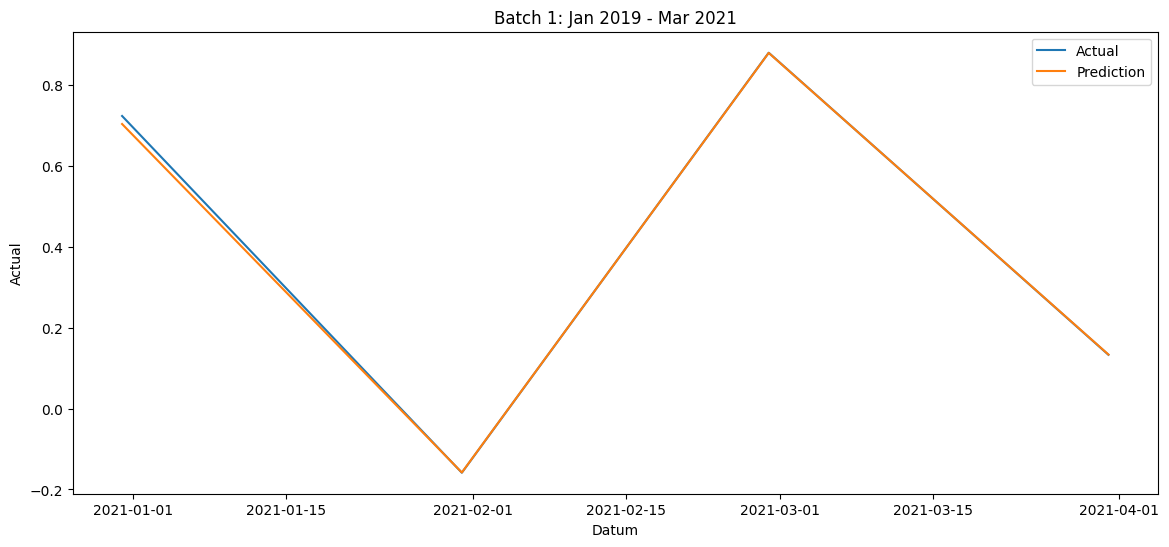

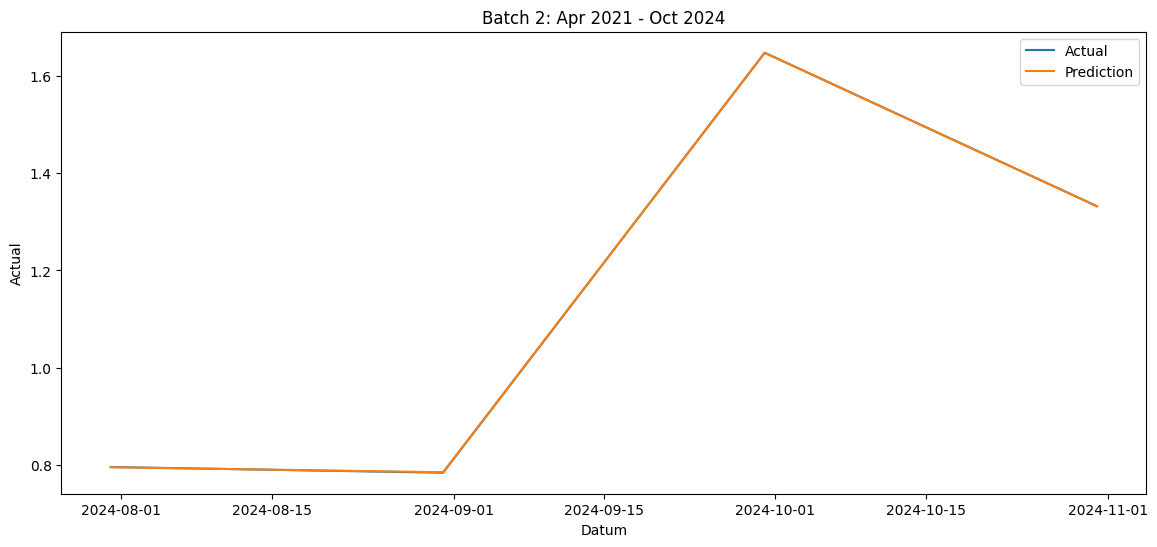

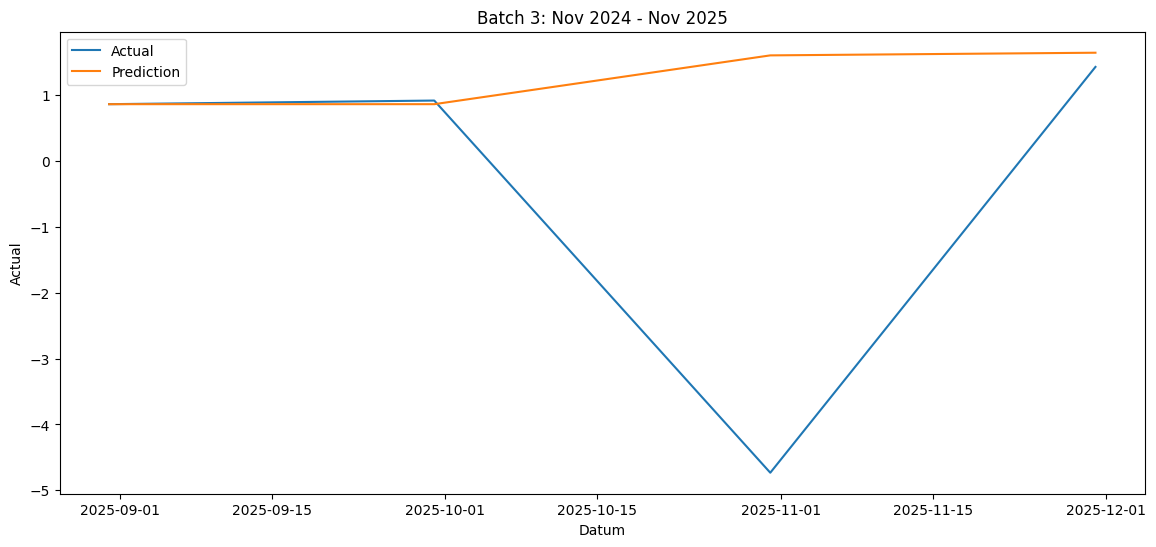

In [53]:
# plotting predictions vs actual values for each batch

plt.figure(figsize=(14, 6)) 
sns.lineplot(data=y_pred_xgboost_1_df, x=y_pred_xgboost_1_df.index, y='Actual', label='Actual')
sns.lineplot(data=y_pred_xgboost_1_df, x=y_pred_xgboost_1_df.index, y='Prediction', label='Prediction')
plt.title('Batch 1: Jan 2019 - Mar 2021')   
plt.show()

plt.figure(figsize=(14, 6))
sns.lineplot(data=y_pred_xgboost_2_df, x=y_pred_xgboost_2_df.index, y='Actual', label='Actual')
sns.lineplot(data=y_pred_xgboost_2_df, x=y_pred_xgboost_2_df.index, y='Prediction', label='Prediction')
plt.title('Batch 2: Apr 2021 - Oct 2024')
plt.show()

plt.figure(figsize=(14, 6)) 
sns.lineplot(data=y_pred_xgboost_3_df, x=y_pred_xgboost_3_df.index, y='Actual', label='Actual')
sns.lineplot(data=y_pred_xgboost_3_df, x=y_pred_xgboost_3_df.index, y='Prediction', label='Prediction')
plt.title('Batch 3: Nov 2024 - Nov 2025')
plt.show()

-> Seems overfitted to me

In [19]:
# predicting and evaluating XGBoost model for batch 1
testing_date = '2021-01-31'

y_pred_xgb_1, mean_relative_error_xgb_1, mean_absolute_error_xgb_1, r2_xgb_1 = train_evaluate_xgboost(
    X_train_1_processed_df[:testing_date], y_train_1_imputed[:testing_date], 
    X_test_1_processed_df.loc[testing_date].values.reshape(1, -1), y_test_1.loc[testing_date:testing_date]
)


# making new data frame for predictions to be able to plot them later
y_pred_xgb = pd.DataFrame(index=X_test_1_processed_df.index)  # creating empty dataframe with index of test set to store predictions later

# addinging predictions to predictions dataframe for batch 1 to be able to plot them later
y_pred_xgb.loc[testing_date] = y_pred_xgb_1[0]
# adding test values to predictions dataframe for comparison
y_pred_xgb.loc[testing_date, 'Actual'] = y_test_1.loc[testing_date]
y_pred_xgb.loc[testing_date, 'Prediction'] = y_pred_xgb_1[0]




ValueError: feature_names must be string, and may not contain [, ] or <

## ARIMAX Model (0,0,0)

In [160]:
# prediction with ARIMAX (0,0,0) 

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

def evaluate_arimax_model(X_train, y_train, X_test, y_test, order):
    # fitting ARIMAX model on training data
    model = SARIMAX(y_train, exog=X_train, order=order)
    model_fit = model.fit(disp=False)
    
    # making predictions on test data
    y_pred = model_fit.forecast(steps=len(y_test), exog=X_test)

    # setting date of y_pred to end of month of one month prior
    y_pred.index = pd.to_datetime(y_pred.index) - pd.DateOffset(months=1) + pd.offsets.MonthEnd(0)
    
    # calculating mean relative error, mean absolute error and r2 score
    mean_relative_error_arimax = np.mean(np.abs((y_test - y_pred) / y_test))
    mean_absolute_error_arimax = mean_absolute_error(y_test, y_pred)
    r2_arimax = r2_score(y_test, y_pred)
    
    return y_pred, mean_relative_error_arimax, mean_absolute_error_arimax, r2_arimax



In [172]:
# predicting first month of test set for batch 1 with ARIMAX (0,0,0) and evaluating the model

# training_end_date = '2020-12-31'
testing_date = '2021-01-31'

y_pred_arimax_1, mean_relative_error_arimax, mean_absolute_error_arimax, r2_arimax  = evaluate_arimax_model(
    X_train_1_processed_df[:testing_date], y_train_1_imputed[:testing_date], 
    X_test_1_processed_df.loc[testing_date].values.reshape(1, -1), y_test_1_imputed.loc[testing_date:testing_date], 
    order=(0,0,0)
    )

# making new data frame for predictions to be able to plot them later
y_pred_arimax = pd.DataFrame(index=X_test_1_processed_df.index)  # creating empty dataframe with index of test set to store predictions later

# addinging predictions to predictions dataframe for batch 1 to be able to plot them later
y_pred_arimax.loc[testing_date] = y_pred_arimax_1[0]
# adding test values to predictions dataframe for comparison
y_pred_arimax.loc[testing_date, 'Actual'] = y_test_1_imputed.loc[testing_date]
y_pred_arimax.loc[testing_date, 'Prediction'] = y_pred_arimax_1[0]

# evaluation metrics for batch 1
#mean_relative_error_arimax = np.mean(np.abs((y_test_1_imputed.loc[testing_date:testing_date] - y_pred_arimax) / y_test_1_imputed))
#mean_absolute_error_arimax = mean_absolute_error(y_test_1_imputed.loc[testing_date:testing_date], y_pred_arimax)
#r2_arimax = r2_score(y_test_1_imputed.loc[testing_date:testing_date], y_pred_arimax)

# adding metrics to predictions dataframe
y_pred_arimax.loc[testing_date, 'Mean_Relative_Error'] = mean_relative_error_arimax
y_pred_arimax.loc[testing_date, 'Mean_Absolute_Error'] = mean_absolute_error_arimax
y_pred_arimax.loc[testing_date, 'R2_Score'] = r2_arimax

# looking at predictions and metrics
y_pred_arimax


,Actual,Prediction,Mean_Relative_Error,Mean_Absolute_Error,R2_Score
Datum,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN
2021-01-31,-0.158603,-1.032312,5.508783,0.873709,NaN
2021-02-28,NaN,NaN,NaN,NaN,NaN
2021-03-31,NaN,NaN,NaN,NaN,NaN


In [186]:
# for loop to predict the rest of the test set for batch 1 with ARIMAX (0,0,0) and evaluating the model for each month

testing_dates = X_test_1_processed_df.index

for testing_date in testing_dates:
    y_pred_arimax_1, mean_relative_error_arimax, mean_absolute_error_arimax, r2_arimax  = evaluate_arimax_model(
        X_train_1_processed_df[:testing_date], y_train_1_imputed[:testing_date], 
        X_test_1_processed_df.loc[testing_date].values.reshape(1, -1), y_test_1_imputed.loc[testing_date:testing_date], 
        order=(0,0,0)
        )
    
    # addinging predictions to predictions dataframe for batch 1 to be able to plot them later
    y_pred_arimax.loc[testing_date] = y_pred_arimax_1[0]
    # adding test values to predictions dataframe for comparison
    y_pred_arimax.loc[testing_date, 'Actual'] = y_test_1_imputed.loc[testing_date]
    y_pred_arimax.loc[testing_date, 'Prediction'] = y_pred_arimax_1[0]
    
    # adding metrics to predictions dataframe
    y_pred_arimax.loc[testing_date, 'Mean_Relative_Error'] = mean_relative_error_arimax
    y_pred_arimax.loc[testing_date, 'Mean_Absolute_Error'] = mean_absolute_error_arimax
    y_pred_arimax.loc[testing_date, 'R2_Score'] = r2_arimax

y_pred_arimax_batch1 = y_pred_arimax.copy()  # creating copy of predictions dataframe for batch 1 to be able to use it later for plotting and comparison with other batches
y_pred_arimax

,Actual,Prediction,Mean_Relative_Error,Mean_Absolute_Error,R2_Score
Datum,,,,,
2020-12-31,0.723624,-5.216018,8.208187,5.939642,NaN
2021-01-31,-0.158603,-1.032312,5.508783,0.873709,NaN
2021-02-28,0.880079,-0.642395,1.729928,1.522474,NaN
2021-03-31,0.133023,-0.989589,8.439234,1.122612,NaN
2024-07-31,0.796324,-1.339881,2.682583,2.136205,NaN
2024-08-31,0.784604,-0.760340,1.969074,1.544944,NaN
2024-09-30,1.646908,0.087900,0.946627,1.559008,NaN
2024-10-31,1.331671,0.878522,0.340286,0.453150,NaN


In [187]:
# predicting second batch with ARIMAX (0,0,0) and evaluating the model for each month with for loop

testing_dates_2 = X_test_2_processed_df.index

for testing_date in testing_dates_2:
    y_pred_arimax_2, mean_relative_error_arimax, mean_absolute_error_arimax, r2_arimax  = evaluate_arimax_model(
        X_train_2_processed_df[:testing_date], y_train_2_imputed[:testing_date], 
        X_test_2_processed_df.loc[testing_date].values.reshape(1, -1), y_test_2_imputed.loc[testing_date:testing_date], 
        order=(0,0,0)
        )
    
    # addinging predictions to predictions dataframe for batch 2 to be able to plot them later
    y_pred_arimax.loc[testing_date] = y_pred_arimax_2[0]
    # adding test values to predictions dataframe for comparison
    y_pred_arimax.loc[testing_date, 'Actual'] = y_test_2_imputed.loc[testing_date]
    y_pred_arimax.loc[testing_date, 'Prediction'] = y_pred_arimax_2[0]
    
    # adding metrics to predictions dataframe
    y_pred_arimax.loc[testing_date, 'Mean_Relative_Error'] = mean_relative_error_arimax
    y_pred_arimax.loc[testing_date, 'Mean_Absolute_Error'] = mean_absolute_error_arimax
    y_pred_arimax.loc[testing_date, 'R2_Score'] = r2_arimax

# making copy of predictions dataframe for batch 2 to be able to use it later for plotting and comparison with other batches
y_pred_arimax_batch2 = y_pred_arimax.copy()
y_pred_arimax

,Actual,Prediction,Mean_Relative_Error,Mean_Absolute_Error,R2_Score
Datum,,,,,
2020-12-31,0.723624,-5.216018,8.208187,5.939642,NaN
2021-01-31,-0.158603,-1.032312,5.508783,0.873709,NaN
2021-02-28,0.880079,-0.642395,1.729928,1.522474,NaN
2021-03-31,0.133023,-0.989589,8.439234,1.122612,NaN
2024-07-31,0.796324,-1.339881,2.682583,2.136205,NaN
2024-08-31,0.784604,-0.760340,1.969074,1.544944,NaN
2024-09-30,1.646908,0.087900,0.946627,1.559008,NaN
2024-10-31,1.331671,0.878522,0.340286,0.453150,NaN


In [188]:
# predicting third batch with ARIMAX (0,0,0) and evaluating the model for each month with for loop

testing_dates_3 = X_test_3_processed_df.index

for testing_date in testing_dates_3:
    y_pred_arimax_3, mean_relative_error_arimax, mean_absolute_error_arimax, r2_arimax  = evaluate_arimax_model(
        X_train_3_processed_df[:testing_date], y_train_3_imputed[:testing_date], 
        X_test_3_processed_df.loc[testing_date].values.reshape(1, -1), y_test_3_imputed.loc[testing_date:testing_date], 
        order=(0,0,0)
        )
    
    # addinging predictions to predictions dataframe for batch 3 to be able to plot them later
    y_pred_arimax.loc[testing_date] = y_pred_arimax_3[0]
    # adding test values to predictions dataframe for comparison
    y_pred_arimax.loc[testing_date, 'Actual'] = y_test_3_imputed.loc[testing_date]
    y_pred_arimax.loc[testing_date, 'Prediction'] = y_pred_arimax_3[0]
    
    # adding metrics to predictions dataframe
    y_pred_arimax.loc[testing_date, 'Mean_Relative_Error'] = mean_relative_error_arimax
    y_pred_arimax.loc[testing_date, 'Mean_Absolute_Error'] = mean_absolute_error_arimax
    y_pred_arimax.loc[testing_date, 'R2_Score'] = r2_arimax

# making copy of predictions dataframe for batch 3 to be able to use it later for plotting and comparison with other batches
y_pred_arimax_batch3 = y_pred_arimax.copy()
y_pred_arimax

,Actual,Prediction,Mean_Relative_Error,Mean_Absolute_Error,R2_Score
Datum,,,,,
2020-12-31,0.723624,-5.216018,8.208187,5.939642,NaN
2021-01-31,-0.158603,-1.032312,5.508783,0.873709,NaN
2021-02-28,0.880079,-0.642395,1.729928,1.522474,NaN
2021-03-31,0.133023,-0.989589,8.439234,1.122612,NaN
2024-07-31,0.796324,-1.339881,2.682583,2.136205,NaN
2024-08-31,0.784604,-0.760340,1.969074,1.544944,NaN
2024-09-30,1.646908,0.087900,0.946627,1.559008,NaN
2024-10-31,1.331671,0.878522,0.340286,0.453150,NaN
2025-08-31,0.861298,-1.560896,2.812261,2.422194,NaN


In [201]:
# correcting r2_score for predictions of batch 1

y_pred_arimax_batch1['R2_Score'] = r2_score(y_pred_arimax_batch1['Actual'], y_pred_arimax_batch1['Prediction'])

# correcting r2_score for predictions of batch 2
y_pred_arimax_batch2['R2_Score'] = r2_score(y_pred_arimax_batch2['Actual'], y_pred_arimax_batch2['Prediction'])

# correcting r2_score for predictions of batch 3
y_pred_arimax_batch3['R2_Score'] = r2_score(y_pred_arimax_batch3['Actual'], y_pred_arimax_batch3['Prediction'])

# adding r2_score to predictions dataframe for batch 1
y_pred_arimax['R2_Score'].loc[:'2021-03-31'] = y_pred_arimax_batch1['R2_Score']
# adding r2_score to predictions dataframe for batch 2
y_pred_arimax['R2_Score'].loc['2024-07-31':'2024-10-31'] = y_pred_arimax_batch2['R2_Score']
# adding r2_score to predictions dataframe for batch 3  
y_pred_arimax['R2_Score'].loc['2025-08-30':] = y_pred_arimax_batch3['R2_Score']

y_pred_arimax

,Actual,Prediction,Mean_Relative_Error,Mean_Absolute_Error,R2_Score
Datum,,,,,
2020-12-31,0.723624,-5.216018,8.208187,5.939642,-19.783500
2021-01-31,-0.158603,-1.032312,5.508783,0.873709,-19.783500
2021-02-28,0.880079,-0.642395,1.729928,1.522474,-19.783500
2021-03-31,0.133023,-0.989589,8.439234,1.122612,-19.783500
2024-07-31,0.796324,-1.339881,2.682583,2.136205,-19.783500
2024-08-31,0.784604,-0.760340,1.969074,1.544944,-19.783500
2024-09-30,1.646908,0.087900,0.946627,1.559008,-19.783500
2024-10-31,1.331671,0.878522,0.340286,0.453150,-19.783500
2025-08-31,0.861298,-1.560896,2.812261,2.422194,-70.864797


In [209]:
# correcting mean relative error for predictions of batch 3 by list comprehension

y_pred_arimax_batch3['Mean_Relative_Error'] = [np.mean(np.abs((row['Actual'] - row['Prediction']) / row['Actual'])) for _, row in y_pred_arimax_batch3.iterrows()]
y_pred_arimax = y_pred_arimax_batch3.copy()  # creating copy of predictions dataframe for batch 3 to be able to use it later for plotting and comparison with other batches
y_pred_arimax

,Actual,Prediction,Mean_Relative_Error,Mean_Absolute_Error,R2_Score
Datum,,,,,
2020-12-31,0.723624,-5.216018,8.208187,5.939642,-70.864797
2021-01-31,-0.158603,-1.032312,5.508783,0.873709,-70.864797
2021-02-28,0.880079,-0.642395,1.729928,1.522474,-70.864797
2021-03-31,0.133023,-0.989589,8.439234,1.122612,-70.864797
2024-07-31,0.796324,-1.339881,2.682583,2.136205,-70.864797
2024-08-31,0.784604,-0.760340,1.969074,1.544944,-70.864797
2024-09-30,1.646908,0.087900,0.946627,1.559008,-70.864797
2024-10-31,1.331671,0.878522,0.340286,0.453150,-70.864797
2025-08-31,0.861298,-1.560896,2.812261,2.422194,-70.864797


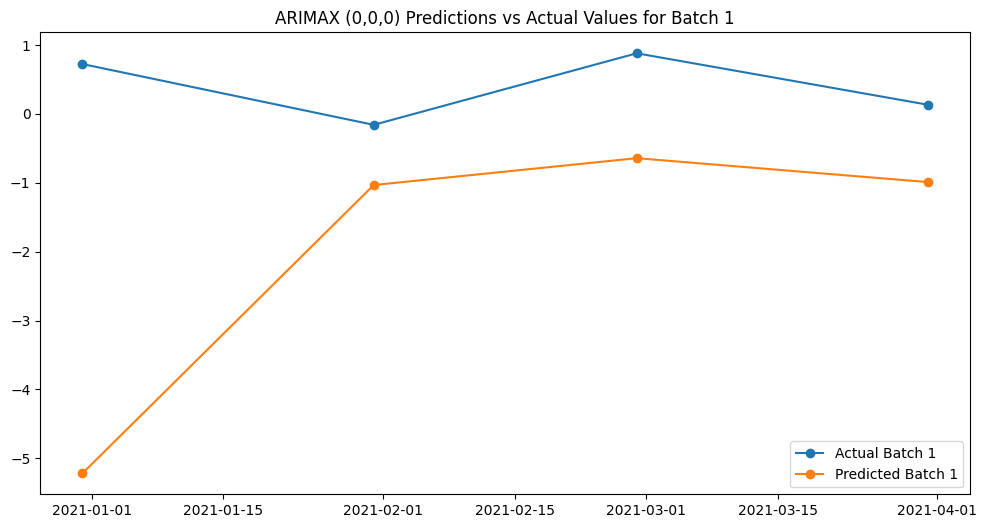

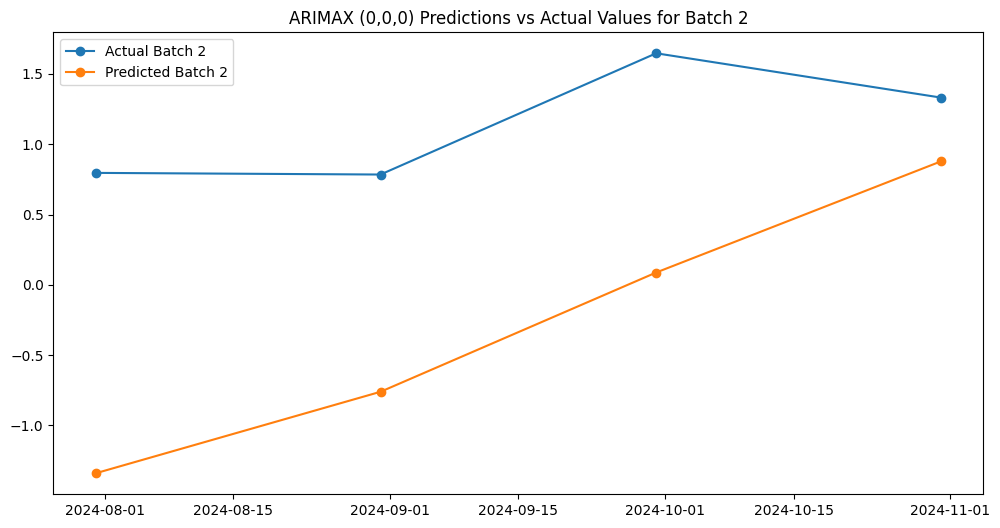

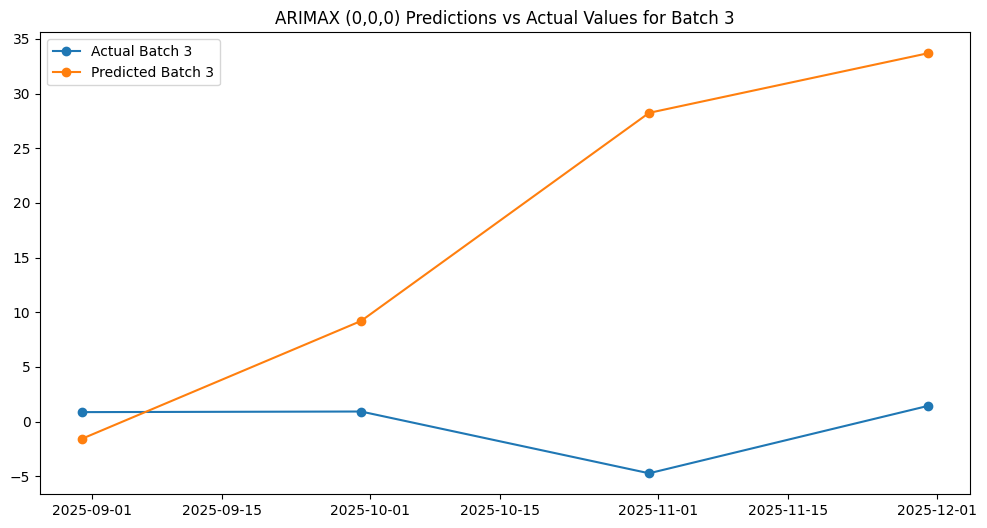

In [195]:
# plotting each batch separately to see how the predictions look like compared to actual values
plt.figure(figsize=(12, 6))
plt.plot(y_pred_arimax_batch1['Actual'].loc[:'2021-03-31'], label='Actual Batch 1', marker='o')
plt.plot(y_pred_arimax_batch1['Prediction'].loc[:'2021-03-31'], label='Predicted Batch 1', marker='o')
plt.legend()    
plt.title('ARIMAX (0,0,0) Predictions vs Actual Values for Batch 1')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_pred_arimax_batch2['Actual'].loc['2024-07-31':'2024-10-31'], label='Actual Batch 2', marker='o')
plt.plot(y_pred_arimax_batch2['Prediction'].loc['2024-07-31':'2024-10-31'], label='Predicted Batch 2', marker='o')
plt.legend()    
plt.title('ARIMAX (0,0,0) Predictions vs Actual Values for Batch 2')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_pred_arimax_batch3['Actual'].loc['2025-08-31':], label='Actual Batch 3', marker='o')
plt.plot(y_pred_arimax_batch3['Prediction'].loc['2025-08-31':], label='Predicted Batch 3', marker='o')
plt.legend()
plt.title('ARIMAX (0,0,0) Predictions vs Actual Values for Batch 3')
plt.show()

##### Findings from ARIMAX Analysis: <br>
<br>
Interestingly errors increase with longer time series as training set with ARIMAX(0,0,0)

down below old ideas for former modelling

In [83]:
# predicting first month of test set for ARIMAX (0,0,1) and evaluating the model

training_end_date = '2020-12-31'
testing_date = '2021-01-31'

y_pred_1, mean_relative_error_arimax_1, mean_absolute_error_arimax_1, r2_arimax_1 = evaluate_arimax_model(
    X_train_1_processed_df[:training_end_date], y_train_1_imputed[:training_end_date], 
    X_test_1_processed_df.loc[testing_date].values.reshape(1, -1), y_test_1_imputed.loc[testing_date:testing_date], 
    order=(0,0,1)
    )

# addinging predictions to the test set for batch 1 to be able to plot them later
y_test_1_imputed.loc[testing_date] = y_pred_1

print("Batch 1 - ARIMAX (0,0,1) - Mean Relative Error:", mean_relative_error_arimax_1)
print("Batch 1 - ARIMAX (0,0,1) - Mean Absolute Error:", mean_absolute_error_arimax_1)
print("Batch 1 - ARIMAX (0,0,1) - R2 Score:", r2_arimax_1)

y_test_1_imputed

Batch 1 - ARIMAX (0,0,1) - Mean Relative Error: 0.3941744301887383
Batch 1 - ARIMAX (0,0,1) - Mean Absolute Error: 0.3056917304727602
Batch 1 - ARIMAX (0,0,1) - R2 Score: nan


Datum
2020-12-31    0.723624
2021-01-31   -1.081216
2021-02-28   -2.388514
2021-03-31   -2.862940
Name: elasticity, dtype: float64

In [84]:
# predicting second month of test set for batch 1 with ARIMAX (0,0,1) and evaluating the model

training_end_date = '2021-01-31'
testing_date = '2021-02-28'

y_pred_1, mean_relative_error_arimax_1, mean_absolute_error_arimax_1, r2_arimax_1 = evaluate_arimax_model(
    X_train_1_processed_df[:training_end_date], y_train_1_imputed[:training_end_date], 
    X_test_1_processed_df.loc[testing_date].values.reshape(1, -1), y_test_1_imputed.loc[testing_date:testing_date], 
    order=(0,0,1)
    )

# addinging predictions to the test set for batch 1 to be able to plot them later
y_test_1_imputed.loc[testing_date] = y_pred_1

print("Batch 1 - ARIMAX (0,0,1) - Mean Relative Error:", mean_relative_error_arimax_1)
print("Batch 1 - ARIMAX (0,0,1) - Mean Absolute Error:", mean_absolute_error_arimax_1)
print("Batch 1 - ARIMAX (0,0,1) - R2 Score:", r2_arimax_1)

y_test_1_imputed

Batch 1 - ARIMAX (0,0,1) - Mean Relative Error: 0.18844065625521053
Batch 1 - ARIMAX (0,0,1) - Mean Absolute Error: 0.4500931503604195
Batch 1 - ARIMAX (0,0,1) - R2 Score: nan


Datum
2020-12-31    0.723624
2021-01-31   -1.081216
2021-02-28   -2.838607
2021-03-31   -2.862940
Name: elasticity, dtype: float64

In [85]:
# predicting third month of test set for batch 1 with ARIMAX (0,0,1) and evaluating the model

training_end_date = '2021-02-28'
testing_date = '2021-03-31'

y_pred_1, mean_relative_error_arimax_1, mean_absolute_error_arimax_1, r2_arimax_1 = evaluate_arimax_model(
    X_train_1_processed_df[:training_end_date], y_train_1_imputed[:training_end_date], 
    X_test_1_processed_df.loc[testing_date].values.reshape(1, -1), y_test_1_imputed.loc[testing_date:testing_date], 
    order=(0,0,1)
    )

# addinging predictions to the test set for batch 1 to be able to plot them later
y_test_1_imputed.loc[testing_date] = y_pred_1

print("Batch 1 - ARIMAX (0,0,1) - Mean Relative Error:", mean_relative_error_arimax_1)
print("Batch 1 - ARIMAX (0,0,1) - Mean Absolute Error:", mean_absolute_error_arimax_1)
print("Batch 1 - ARIMAX (0,0,1) - R2 Score:", r2_arimax_1)

y_test_1_imputed

Batch 1 - ARIMAX (0,0,1) - Mean Relative Error: 0.529303857385823
Batch 1 - ARIMAX (0,0,1) - Mean Absolute Error: 1.5153654089727722
Batch 1 - ARIMAX (0,0,1) - R2 Score: nan


Datum
2020-12-31    0.723624
2021-01-31   -1.081216
2021-02-28   -2.838607
2021-03-31   -4.378306
Name: elasticity, dtype: float64

same as above with next best order and here results permanently worse than before <br>
choice of (0,0,0) is twice as good!

#### ARIMAX Prediction in loop per month

In [32]:
# evaluate ARIMAX model for different orders (p, d, q) and return the mean relative error, mean absolute error and r2 score
from statsmodels.tsa.statespace.sarimax import SARIMAX
def evaluate_arimax_model(X_train, y_train, X_test, y_test, order):
    # fitting ARIMAX model on training data
    model = SARIMAX(y_train, exog=X_train, order=order)
    model_fit = model.fit(disp=False)
    
    # making predictions on test data
    y_pred = model_fit.forecast(steps=len(y_test), exog=X_test)
    
    # calculating mean relative error, mean absolute error and r2 score
    mean_relative_error_arimax = np.mean(np.abs((y_test - y_pred) / y_test))
    mean_absolute_error_arimax = mean_absolute_error(y_test, y_pred)
    r2_arimax = r2_score(y_test, y_pred)
    
    return mean_relative_error_arimax, mean_absolute_error_arimax, r2_arimax

# gridsearch for ARIMAX hyperparameters
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]
best_score_mre_arimax = float('inf')
best_order_mre_arimax = None
best_score_mae_arimax = float('inf')
best_order_mae_arimax = None
best_score_r2_arimax = float('-inf')
best_order_r2_arimax = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            mean_relative_error_arimax, mean_absolute_error_arimax, r2_arimax = evaluate_arimax_model(X_train_processed, y_train_imputed, X_test_processed, y_test_imputed, order)
            print(f'ARIMAX{order} - Mean Relative Error: {mean_relative_error_arimax}, Mean Absolute Error: {mean_absolute_error_arimax}, R2 Score: {r2_arimax}')
            if mean_relative_error_arimax < best_score_mre_arimax:
                best_score_mre_arimax = mean_relative_error_arimax
                best_order_mre_arimax = order
            if mean_absolute_error_arimax < best_score_mae_arimax:
                best_score_mae_arimax = mean_absolute_error_arimax
                best_order_mae_arimax = order
            if r2_arimax > best_score_r2_arimax:
                best_score_r2_arimax = r2_arimax
                best_order_r2_arimax = order
print(f'Best ARIMAX order (Mean Relative Error): {best_order_mre_arimax} with Mean Relative Error: {best_score_mre_arimax}')
print(f'Best ARIMAX order (Mean Absolute Error): {best_order_mae_arimax} with Mean Absolute Error: {best_score_mae_arimax}')
print(f'Best ARIMAX order (R2 Score): {best_order_r2_arimax} with R2 Score: {best_score_r2_arimax}')

# saving results of ARIMAX gridsearch in a dataframe for better visualization
arimax_results = []
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            mean_relative_error_arimax, mean_absolute_error_arimax, r2_arimax = evaluate_arimax_model(X_train_processed, y_train_imputed, X_test_processed, y_test_imputed, order)
            arimax_results.append({'order_arimax': order, 'mean_relative_error_arimax': mean_relative_error_arimax, 'mean_absolute_error_arimax': mean_absolute_error_arimax, 'r2_score_arimax': r2_arimax})
arimax_results_df = pd.DataFrame(arimax_results)
#arimax_results_df.sort_values(by='mean_relative_error_arimax', inplace=True)
arimax_results_df.sort_values(by='mean_absolute_error_arimax', inplace=True)
arimax_results_df

c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency in

ARIMAX(0, 0, 0) - Mean Relative Error: 1.4667225867289564, Mean Absolute Error: 0.3317739022986643, R2 Score: 0.3468473809018836
ARIMAX(0, 0, 1) - Mean Relative Error: 2.046726394128478, Mean Absolute Error: 0.42243964373661447, R2 Score: -0.12878390885443425
ARIMAX(0, 0, 2) - Mean Relative Error: 8.1405507659602, Mean Absolute Error: 2.294057730695314, R2 Score: -38.42343240627561
ARIMAX(0, 1, 0) - Mean Relative Error: 7.902575110434837, Mean Absolute Error: 1.911618840733694, R2 Score: -28.11496423869166
ARIMAX(0, 1, 1) - Mean Relative Error: 4.521194202234191, Mean Absolute Error: 1.0890220808385955, R2 Score: -6.255866030057146


c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency in

ARIMAX(0, 1, 2) - Mean Relative Error: 17.70901414378875, Mean Absolute Error: 3.3376125869070385, R2 Score: -112.56782010398555
ARIMAX(1, 0, 0) - Mean Relative Error: 3.2690155001756267, Mean Absolute Error: 0.5711107373450577, R2 Score: -1.9906774028480245
ARIMAX(1, 0, 1) - Mean Relative Error: 4.057991090015011, Mean Absolute Error: 0.9780607594449588, R2 Score: -5.01466952568971


c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarni

ARIMAX(1, 0, 2) - Mean Relative Error: 17.893041722826275, Mean Absolute Error: 3.422187851694554, R2 Score: -118.13269641484526
ARIMAX(1, 1, 0) - Mean Relative Error: 4.508896040439668, Mean Absolute Error: 1.1767689881045573, R2 Score: -8.971308398568546
ARIMAX(1, 1, 1) - Mean Relative Error: 22.33916166195679, Mean Absolute Error: 5.01668841642133, R2 Score: -221.07950035557778
ARIMAX(1, 1, 2) - Mean Relative Error: 34.24680041155334, Mean Absolute Error: 7.601608158989777, R2 Score: -479.40616089985207


c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-pack

ARIMAX(2, 0, 0) - Mean Relative Error: 5.693099123978283, Mean Absolute Error: 1.117805598146869, R2 Score: -7.804434836915952
ARIMAX(2, 0, 1) - Mean Relative Error: 22.33464913153514, Mean Absolute Error: 5.0430064707990825, R2 Score: -223.59114078744736


c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarni

ARIMAX(2, 0, 2) - Mean Relative Error: 38.20808891307098, Mean Absolute Error: 8.510274104688712, R2 Score: -578.893786550345
ARIMAX(2, 1, 0) - Mean Relative Error: 7.098799203221227, Mean Absolute Error: 1.2124568256966701, R2 Score: -13.536224450602537


c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\stat

ARIMAX(2, 1, 1) - Mean Relative Error: 25.81988858617545, Mean Absolute Error: 5.818065379830765, R2 Score: -292.4429089199825
ARIMAX(2, 1, 2) - Mean Relative Error: 21.73142277696167, Mean Absolute Error: 4.8382940284663665, R2 Score: -204.6546039214873
Best ARIMAX order (Mean Relative Error): (0, 0, 0) with Mean Relative Error: 1.4667225867289564
Best ARIMAX order (Mean Absolute Error): (0, 0, 0) with Mean Absolute Error: 0.3317739022986643
Best ARIMAX order (R2 Score): (0, 0, 0) with R2 Score: 0.3468473809018836


c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency in

,order_arimax,mean_relative_error_arimax,mean_absolute_error_arimax,r2_score_arimax
0,"(0, 0, 0)",1.466723,0.331774,0.346847
1,"(0, 0, 1)",2.046726,0.422440,-0.128784
6,"(1, 0, 0)",3.269016,0.571111,-1.990677
7,"(1, 0, 1)",4.057991,0.978061,-5.014670
4,"(0, 1, 1)",4.521194,1.089022,-6.255866
12,"(2, 0, 0)",5.693099,1.117806,-7.804435
9,"(1, 1, 0)",4.508896,1.176769,-8.971308
15,"(2, 1, 0)",7.098799,1.212457,-13.536224
3,"(0, 1, 0)",7.902575,1.911619,-28.114964
2,"(0, 0, 2)",8.140551,2.294058,-38.423432


batch 1, ARIMAX: choice of (0,0,0)

## Base Models: XGBoost, ARIMA, Neural Network

In [ ]:
# initiating XGBoost Regressor, ARIMA and Neuronal Network models for batch 1
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.neural_network import MLPRegressor

model_xgb = XGBRegressor(random_state=42)
model_arima = ARIMA(y_train_imputed, order=(1, 0, 0))   
    # order=(p,d,q) where p is the number of lag observations included in the model, 
    # d is the number of times that the raw observations are differenced, 
    # and q is the size of the moving average window
model_nn = MLPRegressor(random_state=42, max_iter=1000)



c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [ ]:
# model fit, prediction and evaluation for batch 1
model_xgb.fit(X_train_processed, y_train_imputed)
y_pred_xgb = model_xgb.predict(X_test_processed)

model_arima_fit = model_arima.fit()
y_pred_arima = model_arima_fit.forecast(steps=4)
y_pred_arima = pd.Series(y_pred_arima, index=y_test_imputed.index)

y_pred_nn = model_nn.fit(X_train_processed, y_train_imputed).predict(X_test_processed)

# evaluating models with Mean Absolute Error (MAE) and R-squared (R2) score
from sklearn.metrics import mean_absolute_error, r2_score

mae_xgb = mean_absolute_error(y_test_imputed, y_pred_xgb)
r2_xgb = r2_score(y_test_imputed, y_pred_xgb)
mae_arima = mean_absolute_error(y_test_imputed, y_pred_arima)
r2_arima = r2_score(y_test_imputed, y_pred_arima)
mae_nn = mean_absolute_error(y_test_imputed, y_pred_nn)
r2_nn = r2_score(y_test_imputed, y_pred_nn)

print(f"XGBoost MAE: {mae_xgb:.4f}, R2: {r2_xgb:.4f}")
print(f"ARIMA MAE: {mae_arima:.4f}, R2: {r2_arima:.4f}")
print(f"Neuronal Network MAE: {mae_nn:.4f}, R2: {r2_nn:.4f}") 


XGBoost MAE: 0.8518, R2: -3.8173
ARIMA MAE: 0.7269, R2: -2.9476
Neuronal Network MAE: 14.5985, R2: -1367.9273


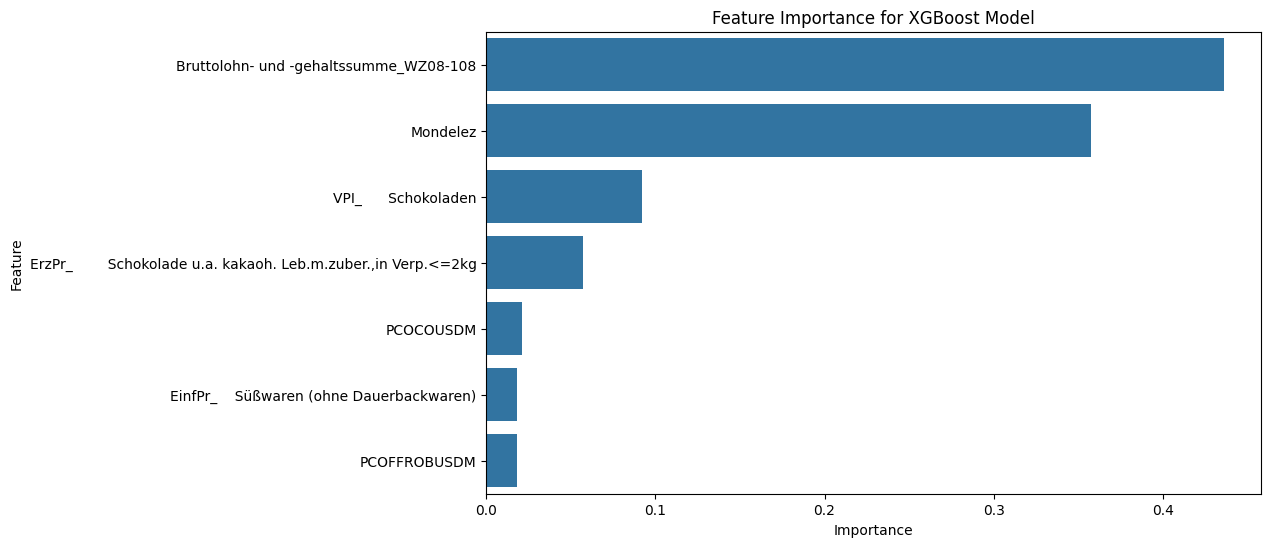

In [21]:
# feature importance for XGBoost model
importances = model_xgb.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for XGBoost Model')
plt.show()

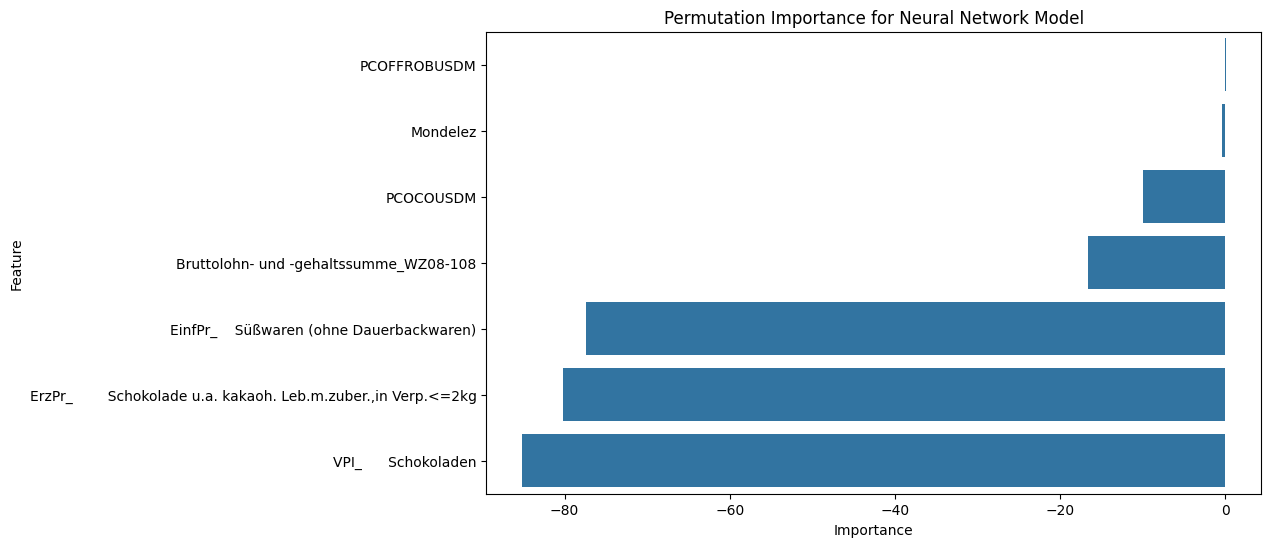

In [23]:
# permutation importance neural network model
# getting feature importance for neural network model using permutation importance  
from sklearn.inspection import permutation_importance
result = permutation_importance(model_nn, X_test_processed, y_test_imputed, n_repeats=10, random_state=42)
perm_importance_df = pd.DataFrame({'Feature': X_train_features, 'Importance': result.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# plotting feature importance for neural network model
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)   
plt.title('Permutation Importance for Neural Network Model')
plt.show()

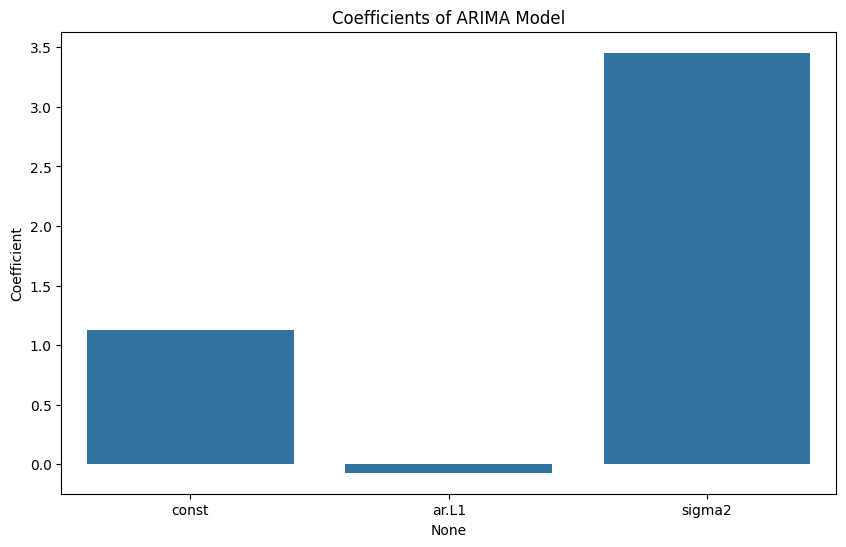

In [24]:
# coefficients of ARIMA model
coefficients = model_arima_fit.params
coefficients_df = pd.DataFrame({'Coefficient': coefficients})

# visualizing coefficients of ARIMA model
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients_df.index, y='Coefficient', data=coefficients_df)
plt.title('Coefficients of ARIMA Model')
plt.show()


Coefficient Types in statsmodels <br>
ar.L1, ar.L2, etc. (Autoregressive Coefficients): <br>
Represent the relationship between the current value and past values (lags).<br>
<br>
ma.L1, ma.L2, etc. (Moving Average Coefficients): <br>
Represent the relationship between the current value and past forecast errors (shocks).<br>
<br>
sigma2: The variance of the residuals (white noise).const: <br>
The intercept or mean of the process. <br>
<br>
<br>
2. Interpretation Breakdown <br>
ar.L1 (e.g., 0.9)Positive, < 1: A strong positive coefficient means if the previous day’s value was high, today's will likely be high (trend persistence).<br>
ar.L1 (e.g., -0.5)Negative: A negative coefficient implies a mean-reverting behavior (high value today leads to a lower value tomorrow).<br>
ma.L1 (e.g., -0.9)Negative, high magnitude: Suggests the model is heavily correcting for the previous day’s forecast error, common in rapidly adapting systems.<br>
const Represents the underlying mean of the differenced series (or the raw series if \(d=0\)).<br>
**`P>z

#### Training and Testing on Semi-Rolling Windows

#### Model Training on second batch

In [ ]:
# model fit, prediction and evaluation for batch 2
# repeating the same steps for batch 2 with respective train and test sets  



### How to use classes


In [6]:
from core.classes import FeatureEngineer, DataImputation
from imblearn.pipeline import Pipeline 

In [ ]:
number_train = 70
# the dict has entry of the form column: [lag_0, lag_1,lag_2]
# note that the column must be given by the name and not the number and that if the 
# column should be kept it need to have lag = 0
dict_lag = {}
for k in [39, 41, 43, 45, 78, 88, 93]:
    dict_lag.update({df.columns.values[k]: [1]})
for k in [166, 167, 168, 169, 170]: 
    dict_lag.update({df.columns.values[k]: [0]})

df_selected_col = df.loc[:, list(dict_lag)]
df_train = df_selected_col.iloc[:number_train, :]
df_test = df_selected_col.iloc[number_train: , :]
df_train

pipeline = Pipeline([('DaIm', DataImputation()), 
                     ('FE', FeatureEngineer(dict_lag))])

df_train_transf = pipeline.fit_transform(df_train)
df_test_transf = pipeline.transform(df_test)
df_train_transf

c:\Users\judit\Portfolioproject_mit_Salima\dpp_projekt_2026\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\judit\Portfolioproject_mit_Salima\dpp_projekt_2026\.venv\Lib\site-packages\imblearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 0.15 instead of the current warning.
  warnings.warn(


,Beschäftigte_WZ08-1082_lag_by_1,Geleistete Arbeitsstunden_WZ08-1082_lag_by_1,Bruttolohn- und -gehaltssumme_WZ08-1082_lag_by_1,Umsatz_WZ08-1082_lag_by_1,"ErzPr_Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg_lag_by_1",EinfPr_Süßwaren (ohne Dauerbackwaren)_lag_by_1,VPI_Schokoladen_lag_by_1,PCOCOUSDM,PCOFFROBUSDM,Ferrero,Mondelez,LindtSpruengli
date,,,,,,,,,,,,
2019-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2263.335036,41.053913,6.524211,39.095000,NaN
2019-02-28,36176.0,4704000.0,111357000.0,6.619170e+08,97.6,102.4,99.2,2255.804973,40.666500,6.524211,41.495000,NaN
2019-03-31,35363.0,4374000.0,106786000.0,7.964770e+08,97.6,102.3,99.9,2200.484674,37.174762,6.524211,42.429048,NaN
2019-04-30,34926.0,4294000.0,106900000.0,8.120600e+08,97.4,102.5,101.1,2331.131022,37.427727,6.524211,44.421250,NaN
2019-05-31,35197.0,3980000.0,102877000.0,6.919610e+08,97.5,102.3,99.8,2315.072400,37.748182,6.524211,46.047045,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-30,38349.0,4090000.0,151156000.0,8.654190e+08,128.0,184.8,140.3,8380.126610,111.337143,8.442000,62.102500,NaN
2024-07-31,39111.0,4474000.0,145958000.0,8.940960e+08,128.7,184.5,142.3,7164.628035,115.230870,8.581739,61.110870,NaN
2024-08-31,39503.0,4790000.0,143231000.0,1.008190e+09,129.3,186.0,141.5,6791.953817,112.675714,8.002727,63.694545,NaN


### Defining Model with monthly new data

In [ ]:
# defining features with lag and without lag for the monthly model
features_lagged = [39, 41, 43, 45, 78, 88, 93]
features_without_lag = [166, 167, 168, 169, 170]


# time lag of 1 month for the features
X_monthly_lagged1 = df.iloc[:, features_lagged1].shift(1)
# renaming the lagged features to indicate that they are lagged
X_monthly_lagged1.columns = [col + '_lagged' for col in X_monthly_lagged1.columns]

# time lag of 2 month for the features
X_monthly_lagged2 = df.iloc[:, features_lagged1].shift(2)
# renaming the lagged features to indicate that they are lagged
X_monthly_lagged2.columns = [col + '_lagged2' for col in X_monthly_lagged2.columns]

# time lag of 3 month for the features
X_monthly_lagged3 = df.iloc[:, features_lagged1].shift(3)
# renaming the lagged features to indicate that they are lagged
X_monthly_lagged3.columns = [col + '_lagged3' for col in X_monthly_lagged3.columns]

X_monthly_without_lag = df.iloc[:, features_without_lag]
X_monthly = pd.concat([X_monthly_lagged1, X_monthly_lagged2, X_monthly_lagged3, X_monthly_without_lag], axis=1)

# defining target variable for the monthly model
y_monthly = df[target]
X_monthly

,Beschäftigte_WZ08-1082_lagged,Geleistete Arbeitsstunden_WZ08-1082_lagged,Bruttolohn- und -gehaltssumme_WZ08-1082_lagged,Umsatz_WZ08-1082_lagged,"ErzPr_Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg_lagged",EinfPr_Süßwaren (ohne Dauerbackwaren)_lagged,VPI_Schokoladen_lagged,PCOCOUSDM,PCOFFROBUSDM,Ferrero,Mondelez,LindtSpruengli
Datum,,,,,,,,,,,,
2019-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2263.335036,41.053913,NaN,39.095000,NaN
2019-02-28,36176.0,4704000.0,111357000.0,6.619170e+08,97.6,102.4,99.2,2255.804973,40.666500,NaN,41.495000,NaN
2019-03-31,35363.0,4374000.0,106786000.0,7.964770e+08,97.6,102.3,99.9,2200.484674,37.174762,NaN,42.429048,NaN
2019-04-30,34926.0,4294000.0,106900000.0,8.120600e+08,97.4,102.5,101.1,2331.131022,37.427727,NaN,44.421250,NaN
2019-05-31,35197.0,3980000.0,102877000.0,6.919610e+08,97.5,102.3,99.8,2315.072400,37.748182,NaN,46.047045,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-31,40394.0,5028000.0,152502000.0,1.143251e+09,157.4,234.5,167.8,7604.123627,72.351429,8.200000,53.416190,12.290476
2025-09-30,40799.0,4729000.0,149300000.0,1.183673e+09,159.3,235.0,170.2,7006.525856,73.822273,7.976364,53.113636,13.118182
2025-10-31,40849.0,5045000.0,150353000.0,1.493582e+09,163.0,226.6,172.9,5953.567814,73.506818,7.195652,52.461739,13.521739


In [5]:
# seperating train and test data by time
train_size = int(len(df) * 0.9)  # using first 90% of data for training and last 10% for testing
X_train = X_monthly.iloc[:train_size]
X_test = X_monthly.iloc[train_size:]
y_train = y_monthly.iloc[:train_size]
y_test = y_monthly.iloc[train_size:]

#### Defining Monthly Linear Regression Model

In [6]:
# choosing linear regression as first model
from sklearn.linear_model import LinearRegression  
model_baseline = LinearRegression()

#### Filling Nans

In [7]:
# imputation of num_cols:

# defining numerical columns:
num_cols = list(X_train.select_dtypes(exclude='object').columns)

X_train

,Beschäftigte_WZ08-1082_lagged,Geleistete Arbeitsstunden_WZ08-1082_lagged,Bruttolohn- und -gehaltssumme_WZ08-1082_lagged,Umsatz_WZ08-1082_lagged,"ErzPr_Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg_lagged",EinfPr_Süßwaren (ohne Dauerbackwaren)_lagged,VPI_Schokoladen_lagged,PCOCOUSDM,PCOFFROBUSDM,Ferrero,Mondelez,LindtSpruengli
Datum,,,,,,,,,,,,
2019-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2263.335036,41.053913,NaN,39.095000,NaN
2019-02-28,36176.0,4704000.0,111357000.0,6.619170e+08,97.6,102.4,99.2,2255.804973,40.666500,NaN,41.495000,NaN
2019-03-31,35363.0,4374000.0,106786000.0,7.964770e+08,97.6,102.3,99.9,2200.484674,37.174762,NaN,42.429048,NaN
2019-04-30,34926.0,4294000.0,106900000.0,8.120600e+08,97.4,102.5,101.1,2331.131022,37.427727,NaN,44.421250,NaN
2019-05-31,35197.0,3980000.0,102877000.0,6.919610e+08,97.5,102.3,99.8,2315.072400,37.748182,NaN,46.047045,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-30,39845.0,4812000.0,146513000.0,1.459711e+09,134.6,201.8,142.9,7919.328270,90.764000,7.706667,61.880476,10.421200
2024-12-31,39666.0,4916000.0,221234000.0,1.307285e+09,135.2,216.4,143.6,10412.185712,81.897826,7.911111,58.940000,10.764556
2025-01-31,38759.0,3918000.0,159670000.0,9.805100e+08,135.5,222.4,143.6,10710.345483,82.498636,8.355455,55.738182,11.032909


In [8]:
# last entry od LindtSpruengli
X_train.iloc[-1]['LindtSpruengli']

np.float64(12.243428571428572)

In [9]:
# imputation of num_cols in training data:
for col in num_cols:
    if X_train[col].isna().sum() > 0:
        X_train.loc[X_train[col].isna(), col] = X_train[col].median()
X_train[col].isna().sum()

np.int64(0)

In [10]:
# imputation of num_cols in test set:
for col in num_cols:
    if X_test[col].isna().sum() > 0:
        X_test.loc[X_test[col].isna(), col] = X_test[col].median()
X_test[col].isna().sum()

np.int64(0)

In [11]:
# imputation of target variable in training set:
if y_train.isna().sum() > 0:
    y_train.loc[y_train.isna()] = y_train.median()

In [12]:
# imputation of target variable in test set:
if y_test.isna().sum() > 0:
    y_test.loc[y_test.isna()] = y_train.median()

In [13]:
# fitting the model
model_baseline.fit(X_train, y_train)
print(model_baseline.coef_)  # beta (slope)
print(model_baseline.intercept_) 

[ 3.29600545e+04  4.38461178e+01 -7.23346837e-01 -3.03792017e-01
  4.06761180e+05 -1.73552692e+05  4.87248055e+06  1.57321526e+04
 -1.16445990e+06 -1.84547046e+07  1.93256132e+06  4.17627544e+07]
-1465784062.9111886


#### Validation of Monthly Model

In [14]:
# predicting target variable in test set
target_pred = model_baseline.predict(X_test)

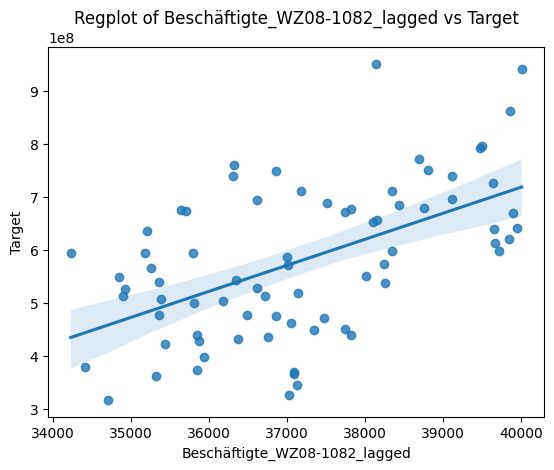

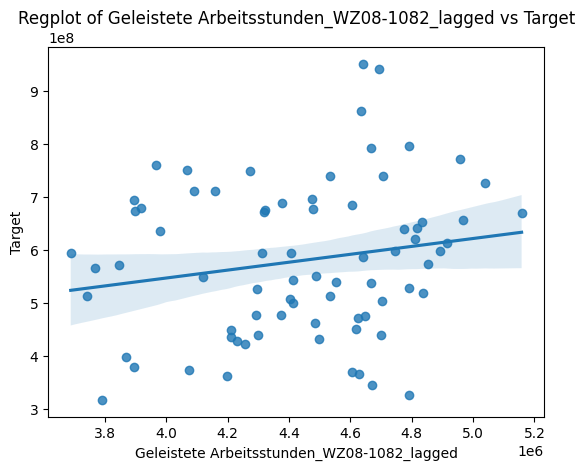

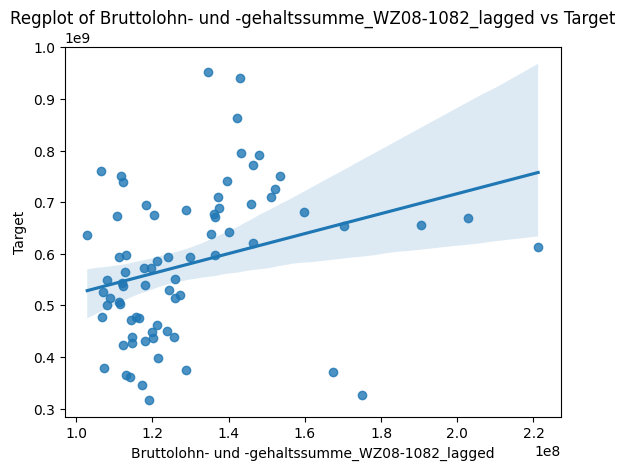

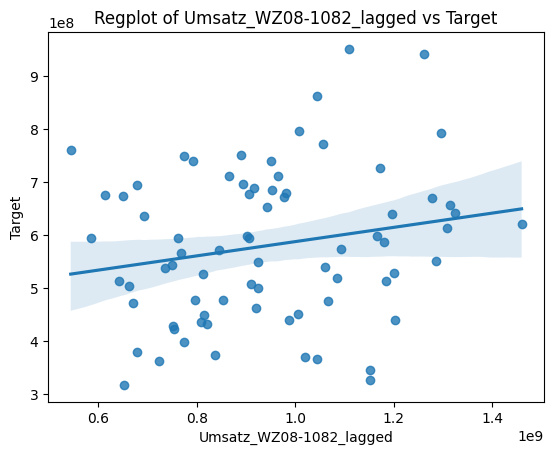

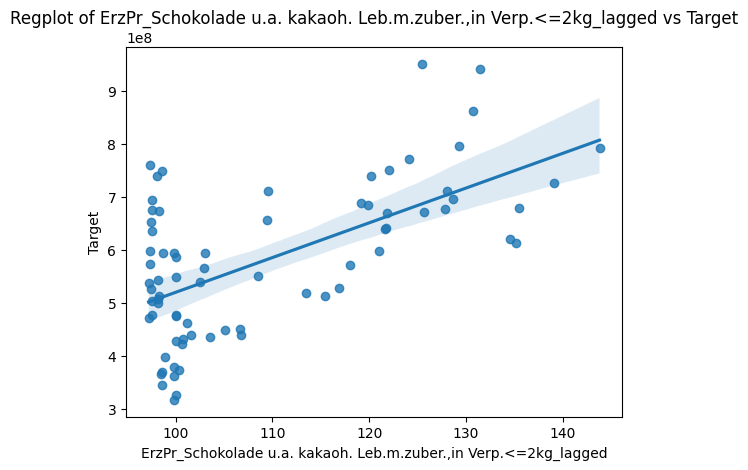

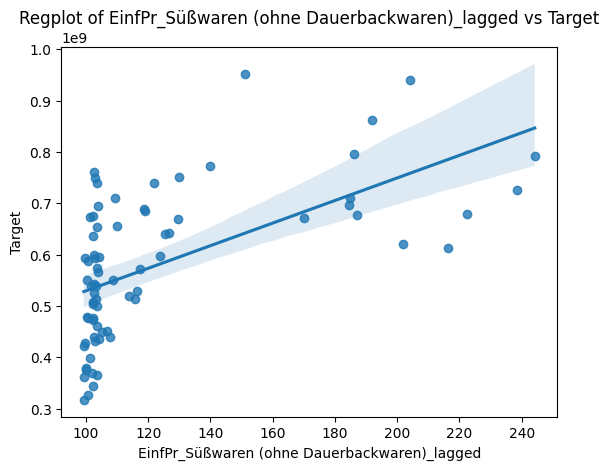

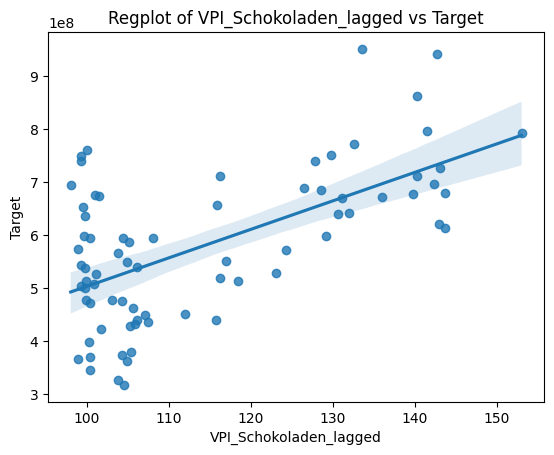

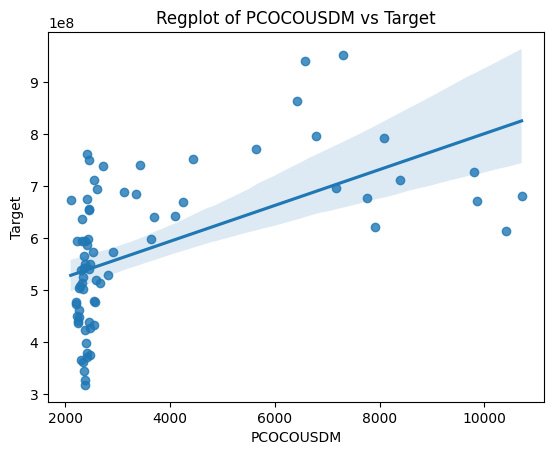

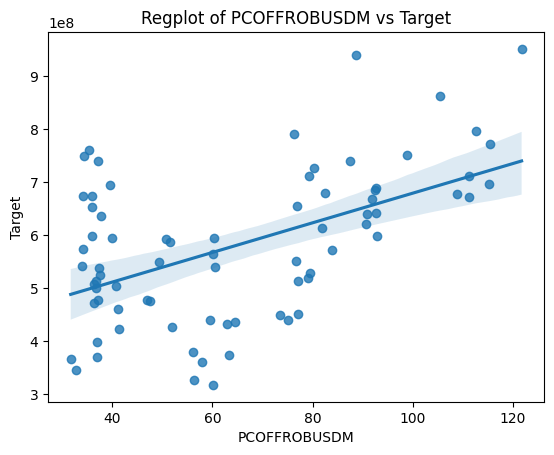

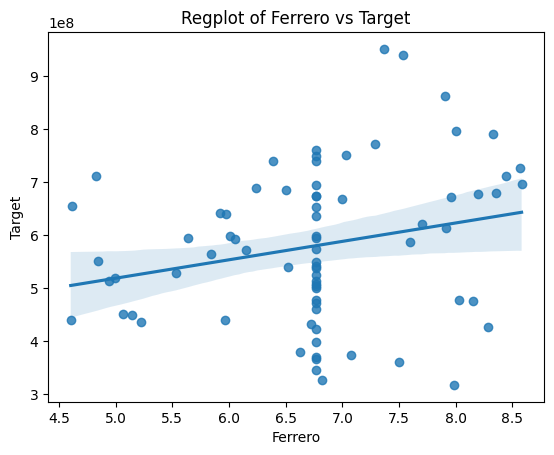

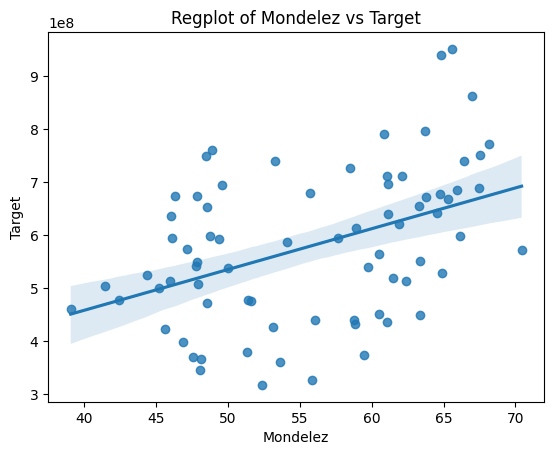

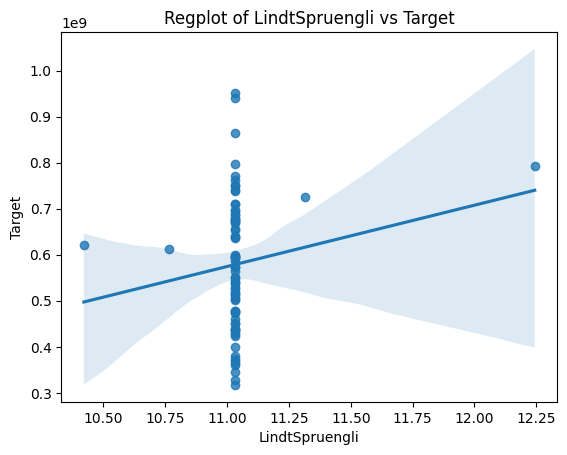

In [15]:
# regplots to visualize the relationship between each feature and the target variable
for col in X_train.columns:
    sns.regplot(x=X_train[col], y=y_train)
    plt.title(f'Regplot of {col} vs Target')
    plt.xlabel(col)
    plt.ylabel('Target')
    plt.show()

In [16]:
# using mean squared error to evaluate the model
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, target_pred)**0.5/np.mean(y_test)  # root mean squared error divided by mean of target variable to get a relative error


np.float64(0.7853909839304356)

In [17]:
# data frame with actual and predicted values for line plot
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': target_pred})
results_df.sort_index(inplace=True)  # sort by index to ensure correct order for line plot
results_df

,Actual,Predicted
Datum,,
2025-04-30,808534000.0,8.725687e+08
2025-05-31,874262000.0,9.302201e+08
2025-06-30,394819000.0,1.049814e+09
2025-07-31,409291000.0,1.034781e+09
2025-08-31,449728000.0,9.699332e+08
2025-09-30,514226000.0,9.995838e+08
2025-10-31,515248000.0,9.500998e+08
2025-11-30,535104000.0,9.206985e+08
2025-12-31,573148000.0,8.786508e+08


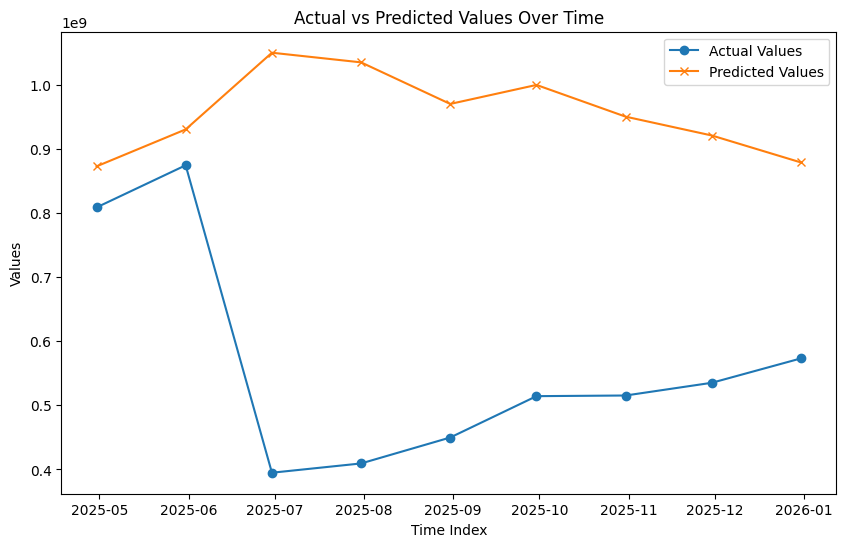

In [18]:
# time series plot based on rsults_df
plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['Actual'], label='Actual Values', marker='o')
plt.plot(results_df.index, results_df['Predicted'], label='Predicted Values', marker='x')
plt.xlabel('Time Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values Over Time')
plt.legend()
plt.show()

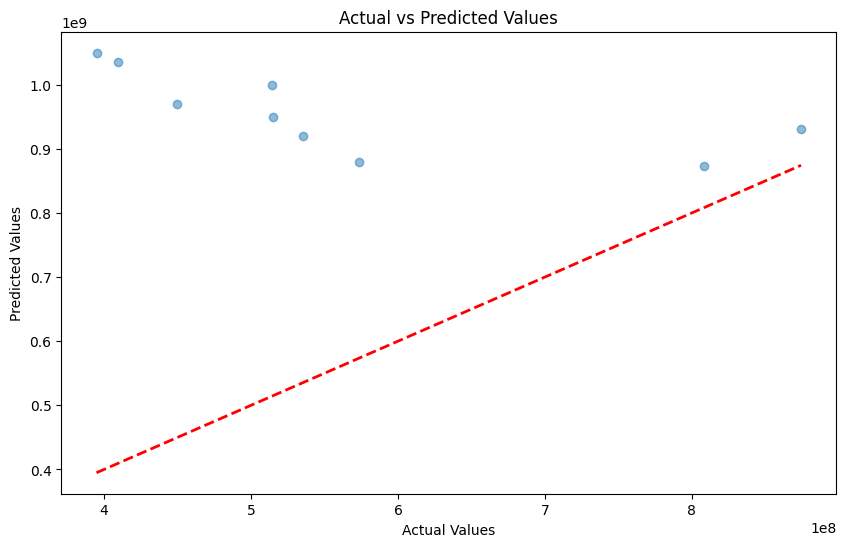

In [19]:
# line plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, target_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [20]:
# using r2 score to evaluate the model
from sklearn.metrics import r2_score
r2_score(y_test, target_pred)


-6.759100752750912

### Another Monthly Model

In [21]:
# initiating ARIMA model
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(y_train, order=(5, 1, 0))  # ARIMA(p,d,q) with p=5, d=1, q=0
arima_model_fit = arima_model.fit()
arima_model_fit.summary()
# predicting with ARIMA model
arima_pred = arima_model_fit.forecast(steps=len(y_test))
arima_pred


c:\Users\judit\Portfolioproject_mit_Salima\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\judit\Portfolioproject_mit_Salima\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\judit\Portfolioproject_mit_Salima\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


2025-04-30    7.989969e+08
2025-05-31    7.453647e+08
2025-06-30    7.156255e+08
2025-07-31    7.087105e+08
2025-08-31    7.205197e+08
2025-09-30    7.427326e+08
2025-10-31    7.533150e+08
2025-11-30    7.479446e+08
2025-12-31    7.379658e+08
Freq: ME, Name: predicted_mean, dtype: float64

ARIMA doesn't work...?